# Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Import

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import time 
from konlpy.tag import Okt
import pandas as pd
import re
from tqdm import trange, notebook

# ÏÖÄÎ†àÎãàÏõÄ ÏóêÎ∏åÎ¶¨ÌÉÄÏûÑ ÏõπÌÅ¨Î°§ÎßÅ

### ÏïÑÎûòÏùò ÏΩîÎìúÎ•º Î≥ÄÍ≤ΩÌï¥Í∞ÄÎ©¥ÏÑú ÏΩîÎ°úÎÇò Ïù¥Ï†Ñ, Ïù¥ÌõÑ, Í≤ÄÏÉâ ÌÇ§ÏõåÎìú "ÏΩîÎ°úÎÇò" Í∏∞Ï§Ä Ï¥ù 3Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏàòÏßë

In [335]:
#baseUrl = "https://everytime.kr/377398/p/3253"
#plusUrl = input("Í≤ÄÏÉâÌï† ÌÉúÍ∑∏Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî : ")

#url = baseUrl + quote_plus(plusUrl)

url = "https://everytime.kr/377399/p/1"

driver = webdriver.Chrome("../docs/chromedriver_win32/chromedriver")
driver.get('https://everytime.kr/login')

#ÌÅ¨Î°§ÎßÅ Ìï† ÌôàÌéòÏù¥ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
driver.find_element_by_name("userid").send_keys("userid")
#ÌÉúÍ∑∏Ïùò ÎÑ§ÏûÑÏù¥ userid Ïù∏ element Í∞ÄÏ†∏Ïò§Í≥† "ÎÇ¥ ÏïÑÏù¥Îîî" ÏûÖÎ†•

driver.find_element_by_name("password").send_keys("password")
#ÌÉúÍ∑∏Ïùò ÎÑ§ÏûÑÏù¥ password Ïù∏ element Í∞ÄÏ†∏Ïò§Í≥† "ÎπÑÎ∞ÄÎ≤àÌò∏" ÏûÖÎ†•

driver.find_element_by_tag_name("input").send_keys(Keys.RETURN)
#Î°úÍ∑∏Ïù∏ Î≤ÑÌäº Ï∞æÍ≥† ÌÅ¥Î¶≠

# Î°úÍ∑∏Ïù∏ ÏôÑÎ£å

driver.get(url) # Î°úÍ∑∏Ïù∏ ÌõÑ Ïù∏Î¨∏Í≤åÏãúÌåêÏóêÏÑú ÏΩîÎ°úÎÇò Í≤ÄÏÉâÏñ¥ 1ÌéòÏù¥ÏßÄ Ïù¥Îèô

time.sleep(3)
    
html = driver.page_source
soup = BeautifulSoup(html)


everyTime=[]

driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a').click()

for page_roof in notebook.tqdm(range(0,1845,2)):
    res = driver.page_source
    soup = BeautifulSoup(res,"html.parser")
    header = soup.select('#container > div.wrap.articles > article > a > h2')
    vote = soup.select('.vote')
    comment = soup.select('.comment')
    text = soup.select('#container > div.wrap.articles > article > a > p')
    date = soup.select('#container > div.wrap.articles > article > a > time')
    driver.find_element_by_css_selector('#container > div.wrap.articles > div.pagination > a.next').click()
    time.sleep(0.8)

    for vote,comment,date,header,text in zip(vote,comment,date,header,text):
         everyTime.append([int(vote.get_text()),int(comment.get_text()),date.get_text(),header.get_text(), text.get_text()])
        
driver.close()

In [336]:
# ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

everyTime

[[0, 0, '12Î∂Ñ Ï†Ñ', 'Ïò§Î•òÏàòÏ†ïÏ¢ÄÌï¥Ï£ºÏÑ∏Ïöî', 'Ïò§Î•òÎú®ÎäîÎç∞ Î≠êÍ∞ÄÏûòÎ™ªÎêúÍ±¥Í∞ÄÏöî?'],
 [0, 3, '22Î∂Ñ Ï†Ñ', 'ÌòÑÍ∏∞Ïú§ Î¨∏ÏÑ±Ï∞¨', 'ÏãúÌóò Ïñ∏Ï†úÎ≥¥ÎäîÏßÄ ÏïåÎ†§Ï§å?'],
 [0, 3, '29Î∂Ñ Ï†Ñ', 'R. I. P', '‚ÄúDiego Maradona‚Äù'],
 [0, 9, '32Î∂Ñ Ï†Ñ', 'ÎßåÏïΩÏóê 1000ÏñµÏù¥ Í∑∏ÎÉ• ÏÉùÍ∏∞Î©¥', 'ÌïôÍµê ÏûêÌá¥Ìï†Í±∞ÏûÑ?'],
 [0,
  0,
  '40Î∂Ñ Ï†Ñ',
  '„Öà„ÖÖ„Öé ÎèÑÏõÄ...',
  '23080 ÎèÑÏôÄÏ£ºÏÑ∏Ïöî„Öú https://open.kakao.com/o/sXe1ilHc'],
 [0, 5, '43Î∂Ñ Ï†Ñ', 'Ìó§Ìó§', 'Í≥†ÎßàÏõ°'],
 [0, 0, '52Î∂Ñ Ï†Ñ', '23080', 'iterator classÎèÑ ÎßåÎì§Ïñ¥ÏïºÌïòÎÇòÏöî?'],
 [0, 13, '11/26 01:27', 'Í∑ºÎç∞ ÎπÑÎåÄÎ©¥Ïù∏Îç∞ Ï∫†ÌÇ§ÎùºÎäî ÏÜåÎ¶¨ÏóÜÏúºÎ©¥', 'Ïò§ÌîàÎ∂ÅÏù¥ÎùºÎäîÏñòÍ∏∞Í≤†ÏßÄ..?'],
 [0, 2, '11/26 01:24', 'ÏòÅÌöå Ïù∏ÌÑ∞Î∑∞ ÌïòÏã† Î∂Ñ Í≥ÑÏã†Í∞ÄÏöî', 'Ïù¥Í±∞ Î≥¥Í≥† ÏùΩÏñ¥ÎèÑ ÎêòÎÇòÏöî....'],
 [0, 3, '11/26 01:22', '21ÌïôÎ≤àÏùÄ Î™áÎÖÑÎèÑ ÏÉùÏù¥ÎÉê?', 'Ïô§ÏºÄ ÎÇòÏù¥ Î®πÏóàÏßÄ...'],
 [0, 8, '11/26 01:20', 'Î¨ºÎ¶¨Ìïô Ïù¥Í≤å ÎßûÎÉê?', 'Ï°¥ÎÇò Ïñ¥Î†µÎÑ§ 23Ïû• 24Ïû•...'],
 [0,
  0,
  '11/26 01:14',
  '„Öá„Ö

In [337]:
# ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞ csv ÌååÏùº Ï†ÄÏû•

et1 = pd.DataFrame(everyTime)
et1.to_csv('../data/ÏΩîÎ°úÎÇòÏù¥ÌõÑÎ™ÖÏßÄÏö©Ïù∏_Ï†ÑÏ≤¥.csv')

In [338]:
df1 = pd.read_csv("../data/ÏΩîÎ°úÎÇòÏù¥ÌõÑÎ™ÖÏßÄÏÑúÏö∏_Ï†ÑÏ≤¥.csv")
df2 = pd.read_csv("../data/ÏΩîÎ°úÎÇòÏù¥ÌõÑÎ™ÖÏßÄÏö©Ïù∏_Ï†ÑÏ≤¥.csv")

In [339]:
df1

Unnamed: 0  0   1            2                     3  \
0               0  0   5         5Î∂Ñ Ï†Ñ                 Î∞ëÏóê Ïï†Í∞Ä   
1               1  0  54        13Î∂Ñ Ï†Ñ               ÎÅùÎßêÏûáÍ∏∞Ìï†ÏÇ¨Îûå   
2               2  0   7        20Î∂Ñ Ï†Ñ               ÎÆ§ÏßÄÏª¨Î≥∏Îã§ÌïòÎ©¥   
3               3  0   0        26Î∂Ñ Ï†Ñ            Í∏ÄÍ≤ΩÏ†Ñ Ïù¥Ï†ïÌôòÍµêÏàòÎãò   
4               4  0   0        29Î∂Ñ Ï†Ñ           Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„ÖáÍµêÏàòÎãò   
...           ... ..  ..          ...                   ...   
31995       31995  0  15  06/25 18:01         ÎÇ®ÏûêÎäî Íµ∞ÎåÄÍ∞îÎã§ÏôîÎã§ Ï≥êÎèÑ   
31996       31996  0   8  06/25 17:56                1ÌïôÎÖÑ Î∞©Ìïô   
31997       31997  0   0  06/25 17:50  Ïú†ÏóîÎÇúÎØºÍ∏∞Íµ¨ ÌïúÍµ≠ÎåÄÌëúÎ∂Ä Î™®Í∏à Ï∫†ÌéòÏù¥ÎÑà   
31998       31998  0   9  06/25 17:49       ÏïàÎÅùÎÇúÏï†Îì§ Í≥ºÏ†ú Î™áÍ∞ú ÎÇ®Ïùå?   
31999       31999  1   2  06/25 17:44               Ï±ÑÏ¥ù ÍøàÍø®ÎäîÎç∞   

                                                       4  
0                                      Î¨∏Ïû•ÎÅùÎßêÏûáÍ∏∞ ÏïàÌï¥Ï§å Ìï¥Ï§ÑÏÇ¨Îûå..  
1                                       ÎÅùÏû•Îã®Ïñ¥ÎßêÍ≥† Ïñ¥Î†§Ïö¥Îã®Ïñ¥Ïì∞ÏßÄÎßêÍ≥†  
2                                             ÌôçÍ¥ëÌò∏ vs Ï°∞ÏäπÏö∞  
3                                     Í∞úÏù∏ÌîÑÎ°úÏ†ùÌä∏ Í∏∞ÏóÖÎ≠òÎ°úÌï¥ÏïºÎêòÎÇò..„Öú  
4              Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„Öá ÍµêÏàòÎãò 13Ï£ºÏ∞® Í≥ºÏ†ú  Í∏∞ÎßêÍ≥†ÏÇ¨ ÏòàÏÉÅÎ¨∏Ï†ú Î™áÍ∞ú ÎÇ¥ÏïºÌï¥Ïöî??  
...                                                  ...  
31995                                Ïó¨ÏûêÍ∞Ä ÎÇòÏù¥ ÎßéÏúºÎ©¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌï¥?  
31996                        Î≠ò Ìï¥Ïïº ÏùòÎØ∏ÏûàÍ≤å ÏãúÍ∞ÑÏùÑ Î≥¥ÎÇº Ïàò ÏûàÏùÑÍπåÏöî...?  
31997                                              Ìï¥Î≥∏ÏÇ¨Îûå?  
31998                           ÎÇò 2Í∞†Îç∞ ÌïòÌïÑ Ï†úÏùº Îπ°ÏÑº 2Í∞úÎùºÏÑú ÏÇ¥Í∏∞Ïã´Îã§  
31999  ÌèâÍ∑¨ 60Ï†êÏù∏Îç∞ ÎÇò 15Ï†êÏù∏ Íøà Íø®Îã§..ÏßÑÏßú Ïñ¥Ï†ú ÏÖ§ ÎßùÌïúÍ≤å Ïñ¥ÏßÄÍ∞ÑÌûà Ï∂©Í≤©Ïù¥ÏóàÎÇòÎ¥ê ...  

[32000 rows x 6 columns]

In [340]:
df2

Unnamed: 0  0  1            2                      3  \
0               0  0  0        12Î∂Ñ Ï†Ñ              Ïò§Î•òÏàòÏ†ïÏ¢ÄÌï¥Ï£ºÏÑ∏Ïöî   
1               1  0  3        22Î∂Ñ Ï†Ñ                ÌòÑÍ∏∞Ïú§ Î¨∏ÏÑ±Ï∞¨   
2               2  0  3        29Î∂Ñ Ï†Ñ                R. I. P   
3               3  0  9        32Î∂Ñ Ï†Ñ      ÎßåÏïΩÏóê 1000ÏñµÏù¥ Í∑∏ÎÉ• ÏÉùÍ∏∞Î©¥   
4               4  0  0        40Î∂Ñ Ï†Ñ              „Öà„ÖÖ„Öé ÎèÑÏõÄ...   
...           ... .. ..          ...                    ...   
18455       18455  0  1  06/16 17:52    Ìï®Î∞ïÍ¥Ä Ï∂úÍµ¨ Ïñ¥ÎîîÏïº ÏïåÎ†§Ï£ºÏÑ∏Ïöî...   
18456       18456  0  1  06/16 17:48  Ìï®Î∞ïÍ¥Ä Ï∞®ÏÑ∏ÎåÄÎÇò Ï∞ΩÏ°∞ÏòàÏà†Í¥Ä Í∑ºÏ≤òÏù∏Í∞ÄÏö©?   
18457       18457  0  0  06/16 17:45                    Îä¶Í≤†ÎàÑ   
18458       18458  0  0  06/16 17:44                    „Öà„Ñ±„Ñ¥   
18459       18459  0  1  06/16 17:36             ÌïôÍµê ÎèÑÏÑúÍ¥Ä Ïó¥ÎûåÏã§   

                                                    4  
0                                     Ïò§Î•òÎú®ÎäîÎç∞ Î≠êÍ∞ÄÏûòÎ™ªÎêúÍ±¥Í∞ÄÏöî?  
1                                       ÏãúÌóò Ïñ∏Ï†úÎ≥¥ÎäîÏßÄ ÏïåÎ†§Ï§å?  
2                                    ‚ÄúDiego Maradona‚Äù  
3                                           ÌïôÍµê ÏûêÌá¥Ìï†Í±∞ÏûÑ?  
4      23080 ÎèÑÏôÄÏ£ºÏÑ∏Ïöî„Öú https://open.kakao.com/o/sXe1ilHc  
...                                               ...  
18455                                 Îß¥Îß¥ ÎèåÍ≥† ÏûàÏñ¥Ïöî... „Öã„Öã  
18456                                            ÏïÑÏïÑ„Ö†„Ö†  
18457                            Îπ®Í∞ÑÎ≤ÑÏä§Ïù∏Îç∞ ÏßÄÍ∏à ÏåçÏö©ÏïÑÌååÌä∏ÎÑ§...Ìïò  
18458                                  kcuÏÑ±Ï†ÅÌôïÏù∏ Ïñ¥Ï∫êÌïòÎÇòÏöî?  
18459                                         Ïó¥Î†§ÏûàÎÇòÏöî??  

[18460 rows x 6 columns]

# Î™ÖÏßÄÎåÄÌïôÍµê Ïù∏Î¨∏ Ï∫†ÌçºÏä§, ÏûêÏó∞ Ï∫†ÌçºÏä§ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©(ÏΩîÎ°úÎÇò Ïù¥ÌõÑ)

In [341]:
df3 = pd.concat([df1,df2],axis=0)

In [342]:
df3

Unnamed: 0  0   1            2                      3  \
0               0  0   5         5Î∂Ñ Ï†Ñ                  Î∞ëÏóê Ïï†Í∞Ä   
1               1  0  54        13Î∂Ñ Ï†Ñ                ÎÅùÎßêÏûáÍ∏∞Ìï†ÏÇ¨Îûå   
2               2  0   7        20Î∂Ñ Ï†Ñ                ÎÆ§ÏßÄÏª¨Î≥∏Îã§ÌïòÎ©¥   
3               3  0   0        26Î∂Ñ Ï†Ñ             Í∏ÄÍ≤ΩÏ†Ñ Ïù¥Ï†ïÌôòÍµêÏàòÎãò   
4               4  0   0        29Î∂Ñ Ï†Ñ            Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„ÖáÍµêÏàòÎãò   
...           ... ..  ..          ...                    ...   
18455       18455  0   1  06/16 17:52    Ìï®Î∞ïÍ¥Ä Ï∂úÍµ¨ Ïñ¥ÎîîÏïº ÏïåÎ†§Ï£ºÏÑ∏Ïöî...   
18456       18456  0   1  06/16 17:48  Ìï®Î∞ïÍ¥Ä Ï∞®ÏÑ∏ÎåÄÎÇò Ï∞ΩÏ°∞ÏòàÏà†Í¥Ä Í∑ºÏ≤òÏù∏Í∞ÄÏö©?   
18457       18457  0   0  06/16 17:45                    Îä¶Í≤†ÎàÑ   
18458       18458  0   0  06/16 17:44                    „Öà„Ñ±„Ñ¥   
18459       18459  0   1  06/16 17:36             ÌïôÍµê ÎèÑÏÑúÍ¥Ä Ïó¥ÎûåÏã§   

                                               4  
0                              Î¨∏Ïû•ÎÅùÎßêÏûáÍ∏∞ ÏïàÌï¥Ï§å Ìï¥Ï§ÑÏÇ¨Îûå..  
1                               ÎÅùÏû•Îã®Ïñ¥ÎßêÍ≥† Ïñ¥Î†§Ïö¥Îã®Ïñ¥Ïì∞ÏßÄÎßêÍ≥†  
2                                     ÌôçÍ¥ëÌò∏ vs Ï°∞ÏäπÏö∞  
3                             Í∞úÏù∏ÌîÑÎ°úÏ†ùÌä∏ Í∏∞ÏóÖÎ≠òÎ°úÌï¥ÏïºÎêòÎÇò..„Öú  
4      Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„Öá ÍµêÏàòÎãò 13Ï£ºÏ∞® Í≥ºÏ†ú  Í∏∞ÎßêÍ≥†ÏÇ¨ ÏòàÏÉÅÎ¨∏Ï†ú Î™áÍ∞ú ÎÇ¥ÏïºÌï¥Ïöî??  
...                                          ...  
18455                            Îß¥Îß¥ ÎèåÍ≥† ÏûàÏñ¥Ïöî... „Öã„Öã  
18456                                       ÏïÑÏïÑ„Ö†„Ö†  
18457                       Îπ®Í∞ÑÎ≤ÑÏä§Ïù∏Îç∞ ÏßÄÍ∏à ÏåçÏö©ÏïÑÌååÌä∏ÎÑ§...Ìïò  
18458                             kcuÏÑ±Ï†ÅÌôïÏù∏ Ïñ¥Ï∫êÌïòÎÇòÏöî?  
18459                                    Ïó¥Î†§ÏûàÎÇòÏöî??  

[50460 rows x 6 columns]

In [343]:
del df3['Unnamed: 0']

In [344]:
df3

0   1            2                      3  \
0      0   5         5Î∂Ñ Ï†Ñ                  Î∞ëÏóê Ïï†Í∞Ä   
1      0  54        13Î∂Ñ Ï†Ñ                ÎÅùÎßêÏûáÍ∏∞Ìï†ÏÇ¨Îûå   
2      0   7        20Î∂Ñ Ï†Ñ                ÎÆ§ÏßÄÏª¨Î≥∏Îã§ÌïòÎ©¥   
3      0   0        26Î∂Ñ Ï†Ñ             Í∏ÄÍ≤ΩÏ†Ñ Ïù¥Ï†ïÌôòÍµêÏàòÎãò   
4      0   0        29Î∂Ñ Ï†Ñ            Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„ÖáÍµêÏàòÎãò   
...   ..  ..          ...                    ...   
18455  0   1  06/16 17:52    Ìï®Î∞ïÍ¥Ä Ï∂úÍµ¨ Ïñ¥ÎîîÏïº ÏïåÎ†§Ï£ºÏÑ∏Ïöî...   
18456  0   1  06/16 17:48  Ìï®Î∞ïÍ¥Ä Ï∞®ÏÑ∏ÎåÄÎÇò Ï∞ΩÏ°∞ÏòàÏà†Í¥Ä Í∑ºÏ≤òÏù∏Í∞ÄÏö©?   
18457  0   0  06/16 17:45                    Îä¶Í≤†ÎàÑ   
18458  0   0  06/16 17:44                    „Öà„Ñ±„Ñ¥   
18459  0   1  06/16 17:36             ÌïôÍµê ÎèÑÏÑúÍ¥Ä Ïó¥ÎûåÏã§   

                                               4  
0                              Î¨∏Ïû•ÎÅùÎßêÏûáÍ∏∞ ÏïàÌï¥Ï§å Ìï¥Ï§ÑÏÇ¨Îûå..  
1                               ÎÅùÏû•Îã®Ïñ¥ÎßêÍ≥† Ïñ¥Î†§Ïö¥Îã®Ïñ¥Ïì∞ÏßÄÎßêÍ≥†  
2                                     ÌôçÍ¥ëÌò∏ vs Ï°∞ÏäπÏö∞  
3                             Í∞úÏù∏ÌîÑÎ°úÏ†ùÌä∏ Í∏∞ÏóÖÎ≠òÎ°úÌï¥ÏïºÎêòÎÇò..„Öú  
4      Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„Öá ÍµêÏàòÎãò 13Ï£ºÏ∞® Í≥ºÏ†ú  Í∏∞ÎßêÍ≥†ÏÇ¨ ÏòàÏÉÅÎ¨∏Ï†ú Î™áÍ∞ú ÎÇ¥ÏïºÌï¥Ïöî??  
...                                          ...  
18455                            Îß¥Îß¥ ÎèåÍ≥† ÏûàÏñ¥Ïöî... „Öã„Öã  
18456                                       ÏïÑÏïÑ„Ö†„Ö†  
18457                       Îπ®Í∞ÑÎ≤ÑÏä§Ïù∏Îç∞ ÏßÄÍ∏à ÏåçÏö©ÏïÑÌååÌä∏ÎÑ§...Ìïò  
18458                             kcuÏÑ±Ï†ÅÌôïÏù∏ Ïñ¥Ï∫êÌïòÎÇòÏöî?  
18459                                    Ïó¥Î†§ÏûàÎÇòÏöî??  

[50460 rows x 5 columns]

In [345]:
df3.columns=['vote','data','comment','title','content']

In [346]:
# ÏµúÏ¢Ö SNS Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•

df3.to_csv("../data/ÏΩîÎ°úÎÇòÏù¥ÌõÑÎ™ÖÏßÄ_final.csv")

# ÏΩîÎ°úÎÇò Ïù¥ÌõÑ SNS Îç∞Ïù¥ÌÑ∞

In [54]:
after = pd.read_csv("../data/ÏΩîÎ°úÎÇòÏù¥ÌõÑÎ™ÖÏßÄ_final.csv")
after

Unnamed: 0  vote  data      comment                  title  \
0               0     0     5         5Î∂Ñ Ï†Ñ                  Î∞ëÏóê Ïï†Í∞Ä   
1               1     0    54        13Î∂Ñ Ï†Ñ                ÎÅùÎßêÏûáÍ∏∞Ìï†ÏÇ¨Îûå   
2               2     0     7        20Î∂Ñ Ï†Ñ                ÎÆ§ÏßÄÏª¨Î≥∏Îã§ÌïòÎ©¥   
3               3     0     0        26Î∂Ñ Ï†Ñ             Í∏ÄÍ≤ΩÏ†Ñ Ïù¥Ï†ïÌôòÍµêÏàòÎãò   
4               4     0     0        29Î∂Ñ Ï†Ñ            Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„ÖáÍµêÏàòÎãò   
...           ...   ...   ...          ...                    ...   
50455       18455     0     1  06/16 17:52    Ìï®Î∞ïÍ¥Ä Ï∂úÍµ¨ Ïñ¥ÎîîÏïº ÏïåÎ†§Ï£ºÏÑ∏Ïöî...   
50456       18456     0     1  06/16 17:48  Ìï®Î∞ïÍ¥Ä Ï∞®ÏÑ∏ÎåÄÎÇò Ï∞ΩÏ°∞ÏòàÏà†Í¥Ä Í∑ºÏ≤òÏù∏Í∞ÄÏö©?   
50457       18457     0     0  06/16 17:45                    Îä¶Í≤†ÎàÑ   
50458       18458     0     0  06/16 17:44                    „Öà„Ñ±„Ñ¥   
50459       18459     0     1  06/16 17:36             ÌïôÍµê ÎèÑÏÑúÍ¥Ä Ïó¥ÎûåÏã§   

                                         content  
0                              Î¨∏Ïû•ÎÅùÎßêÏûáÍ∏∞ ÏïàÌï¥Ï§å Ìï¥Ï§ÑÏÇ¨Îûå..  
1                               ÎÅùÏû•Îã®Ïñ¥ÎßêÍ≥† Ïñ¥Î†§Ïö¥Îã®Ïñ¥Ïì∞ÏßÄÎßêÍ≥†  
2                                     ÌôçÍ¥ëÌò∏ vs Ï°∞ÏäπÏö∞  
3                             Í∞úÏù∏ÌîÑÎ°úÏ†ùÌä∏ Í∏∞ÏóÖÎ≠òÎ°úÌï¥ÏïºÎêòÎÇò..„Öú  
4      Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„Öá ÍµêÏàòÎãò 13Ï£ºÏ∞® Í≥ºÏ†ú  Í∏∞ÎßêÍ≥†ÏÇ¨ ÏòàÏÉÅÎ¨∏Ï†ú Î™áÍ∞ú ÎÇ¥ÏïºÌï¥Ïöî??  
...                                          ...  
50455                            Îß¥Îß¥ ÎèåÍ≥† ÏûàÏñ¥Ïöî... „Öã„Öã  
50456                                       ÏïÑÏïÑ„Ö†„Ö†  
50457                       Îπ®Í∞ÑÎ≤ÑÏä§Ïù∏Îç∞ ÏßÄÍ∏à ÏåçÏö©ÏïÑÌååÌä∏ÎÑ§...Ìïò  
50458                             kcuÏÑ±Ï†ÅÌôïÏù∏ Ïñ¥Ï∫êÌïòÎÇòÏöî?  
50459                                    Ïó¥Î†§ÏûàÎÇòÏöî??  

[50460 rows x 6 columns]

In [55]:
del after['Unnamed: 0']

In [56]:
after.columns=['recommend','comment','date','title','content']

In [57]:
after

recommend  comment         date                  title  \
0              0        5         5Î∂Ñ Ï†Ñ                  Î∞ëÏóê Ïï†Í∞Ä   
1              0       54        13Î∂Ñ Ï†Ñ                ÎÅùÎßêÏûáÍ∏∞Ìï†ÏÇ¨Îûå   
2              0        7        20Î∂Ñ Ï†Ñ                ÎÆ§ÏßÄÏª¨Î≥∏Îã§ÌïòÎ©¥   
3              0        0        26Î∂Ñ Ï†Ñ             Í∏ÄÍ≤ΩÏ†Ñ Ïù¥Ï†ïÌôòÍµêÏàòÎãò   
4              0        0        29Î∂Ñ Ï†Ñ            Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„ÖáÍµêÏàòÎãò   
...          ...      ...          ...                    ...   
50455          0        1  06/16 17:52    Ìï®Î∞ïÍ¥Ä Ï∂úÍµ¨ Ïñ¥ÎîîÏïº ÏïåÎ†§Ï£ºÏÑ∏Ïöî...   
50456          0        1  06/16 17:48  Ìï®Î∞ïÍ¥Ä Ï∞®ÏÑ∏ÎåÄÎÇò Ï∞ΩÏ°∞ÏòàÏà†Í¥Ä Í∑ºÏ≤òÏù∏Í∞ÄÏö©?   
50457          0        0  06/16 17:45                    Îä¶Í≤†ÎàÑ   
50458          0        0  06/16 17:44                    „Öà„Ñ±„Ñ¥   
50459          0        1  06/16 17:36             ÌïôÍµê ÎèÑÏÑúÍ¥Ä Ïó¥ÎûåÏã§   

                                         content  
0                              Î¨∏Ïû•ÎÅùÎßêÏûáÍ∏∞ ÏïàÌï¥Ï§å Ìï¥Ï§ÑÏÇ¨Îûå..  
1                               ÎÅùÏû•Îã®Ïñ¥ÎßêÍ≥† Ïñ¥Î†§Ïö¥Îã®Ïñ¥Ïì∞ÏßÄÎßêÍ≥†  
2                                     ÌôçÍ¥ëÌò∏ vs Ï°∞ÏäπÏö∞  
3                             Í∞úÏù∏ÌîÑÎ°úÏ†ùÌä∏ Í∏∞ÏóÖÎ≠òÎ°úÌï¥ÏïºÎêòÎÇò..„Öú  
4      Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„Öá ÍµêÏàòÎãò 13Ï£ºÏ∞® Í≥ºÏ†ú  Í∏∞ÎßêÍ≥†ÏÇ¨ ÏòàÏÉÅÎ¨∏Ï†ú Î™áÍ∞ú ÎÇ¥ÏïºÌï¥Ïöî??  
...                                          ...  
50455                            Îß¥Îß¥ ÎèåÍ≥† ÏûàÏñ¥Ïöî... „Öã„Öã  
50456                                       ÏïÑÏïÑ„Ö†„Ö†  
50457                       Îπ®Í∞ÑÎ≤ÑÏä§Ïù∏Îç∞ ÏßÄÍ∏à ÏåçÏö©ÏïÑÌååÌä∏ÎÑ§...Ìïò  
50458                             kcuÏÑ±Ï†ÅÌôïÏù∏ Ïñ¥Ï∫êÌïòÎÇòÏöî?  
50459                                    Ïó¥Î†§ÏûàÎÇòÏöî??  

[50460 rows x 5 columns]

In [58]:
# sns_data Ï†ïÍ∑úÏãù ÌëúÌòÑÏùÑ Ïù¥Ïö©Ìïú Ï†ÑÏ≤òÎ¶¨

after['title'] = after['title'].str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£]"," ") # ÌïúÍ∏ÄÏù¥ ÏïÑÎãàÎ©¥ Ï†ÑÎ∂Ä Ï†úÍ±∞
after['content'] = after['content'].str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£]"," ") # ÌïúÍ∏ÄÏù¥ ÏïÑÎãàÎ©¥ Ï†ÑÎ∂Ä Ï†úÍ±∞

In [59]:
# 1Ï∞® Ï†ÑÏ≤òÎ¶¨Î•º Í±∞Ïπú SNS Îç∞Ïù¥ÌÑ∞
after

recommend  comment         date                  title  \
0              0        5         5Î∂Ñ Ï†Ñ                  Î∞ëÏóê Ïï†Í∞Ä   
1              0       54        13Î∂Ñ Ï†Ñ                ÎÅùÎßêÏûáÍ∏∞Ìï†ÏÇ¨Îûå   
2              0        7        20Î∂Ñ Ï†Ñ                ÎÆ§ÏßÄÏª¨Î≥∏Îã§ÌïòÎ©¥   
3              0        0        26Î∂Ñ Ï†Ñ             Í∏ÄÍ≤ΩÏ†Ñ Ïù¥Ï†ïÌôòÍµêÏàòÎãò   
4              0        0        29Î∂Ñ Ï†Ñ            Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„ÖáÍµêÏàòÎãò   
...          ...      ...          ...                    ...   
50455          0        1  06/16 17:52    Ìï®Î∞ïÍ¥Ä Ï∂úÍµ¨ Ïñ¥ÎîîÏïº ÏïåÎ†§Ï£ºÏÑ∏Ïöî      
50456          0        1  06/16 17:48  Ìï®Î∞ïÍ¥Ä Ï∞®ÏÑ∏ÎåÄÎÇò Ï∞ΩÏ°∞ÏòàÏà†Í¥Ä Í∑ºÏ≤òÏù∏Í∞ÄÏö©    
50457          0        0  06/16 17:45                    Îä¶Í≤†ÎàÑ   
50458          0        0  06/16 17:44                    „Öà„Ñ±„Ñ¥   
50459          0        1  06/16 17:36             ÌïôÍµê ÎèÑÏÑúÍ¥Ä Ïó¥ÎûåÏã§   

                                         content  
0                              Î¨∏Ïû•ÎÅùÎßêÏûáÍ∏∞ ÏïàÌï¥Ï§å Ìï¥Ï§ÑÏÇ¨Îûå    
1                               ÎÅùÏû•Îã®Ïñ¥ÎßêÍ≥† Ïñ¥Î†§Ïö¥Îã®Ïñ¥Ïì∞ÏßÄÎßêÍ≥†  
2                                     ÌôçÍ¥ëÌò∏    Ï°∞ÏäπÏö∞  
3                             Í∞úÏù∏ÌîÑÎ°úÏ†ùÌä∏ Í∏∞ÏóÖÎ≠òÎ°úÌï¥ÏïºÎêòÎÇò  „Öú  
4      Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„Öá ÍµêÏàòÎãò   Ï£ºÏ∞® Í≥ºÏ†ú  Í∏∞ÎßêÍ≥†ÏÇ¨ ÏòàÏÉÅÎ¨∏Ï†ú Î™áÍ∞ú ÎÇ¥ÏïºÌï¥Ïöî    
...                                          ...  
50455                            Îß¥Îß¥ ÎèåÍ≥† ÏûàÏñ¥Ïöî    „Öã„Öã  
50456                                       ÏïÑÏïÑ„Ö†„Ö†  
50457                       Îπ®Í∞ÑÎ≤ÑÏä§Ïù∏Îç∞ ÏßÄÍ∏à ÏåçÏö©ÏïÑÌååÌä∏ÎÑ§   Ìïò  
50458                                ÏÑ±Ï†ÅÌôïÏù∏ Ïñ¥Ï∫êÌïòÎÇòÏöî   
50459                                    Ïó¥Î†§ÏûàÎÇòÏöî    

[50460 rows x 5 columns]

--------

# SNS Îç∞Ïù¥ÌÑ∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî

In [60]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±Ïóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ IMPORT

import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = after
train_data[:30] # ÏÉÅÏúÑ 5Í∞ú Ï∂úÎ†•

recommend  comment         date                      title  \
0           0        5         5Î∂Ñ Ï†Ñ                      Î∞ëÏóê Ïï†Í∞Ä   
1           0       54        13Î∂Ñ Ï†Ñ                    ÎÅùÎßêÏûáÍ∏∞Ìï†ÏÇ¨Îûå   
2           0        7        20Î∂Ñ Ï†Ñ                    ÎÆ§ÏßÄÏª¨Î≥∏Îã§ÌïòÎ©¥   
3           0        0        26Î∂Ñ Ï†Ñ                 Í∏ÄÍ≤ΩÏ†Ñ Ïù¥Ï†ïÌôòÍµêÏàòÎãò   
4           0        0        29Î∂Ñ Ï†Ñ                Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„ÖáÍµêÏàòÎãò   
5           0        0        31Î∂Ñ Ï†Ñ        ÎîîÎßàÏ†Ñ Í∏∞ÎßêÎ≥¥Í≥†ÏÑú Ïù¥Í±∞ Ïñ¥ÎñªÍ≤å ÌïòÎÉê   
6           0       12        37Î∂Ñ Ï†Ñ         Í∑∏ Ï§åÏúºÎ°ú ÎÇ¥ÏñºÍµ¥ Î≥¥Ïù¥Í≤åÌï¥ÏïºÌïòÎäîÎç∞   
7           0        2        40Î∂Ñ Ï†Ñ                ÌîΩÏä§ÏïÑÌä∏ Í≥®Îìú Ïñ¥Îïå    
8           0        2        50Î∂Ñ Ï†Ñ              Îã§ÎãàÏóò Ï†úÏûÑÏä§ Ïú†Îãõ      
9           0        5        53Î∂Ñ Ï†Ñ                    Í≥†Ï†Ñ Ïß§ Î∞©Ï∂ú   
10          0        4  11/26 01:11                          Î∞©   
11          0        9  11/26 01:10                     ÌîÑÎ¶∞ÌÑ∞ Ïó∞Í≤∞   
12          0        7  11/26 01:08                    ÎßõÏßëÌëú ÏπúÍµ¨Ïïº   
13          1        2  11/26 01:05                        ÏßÄÏ†ïÌôú   
14          0        2  11/26 01:04                    Î™ÖÏßÄÎåÄ ÎßõÏßëÌëú   
15          0        4  11/26 01:03                   Ïù¥Í±¥ÎÑàÎ¨¥ÌïòÏßÄÏïäÎãà   
16          0        0  11/26 01:03                    ÎîúÎü∞ ÏòÅÌöå Ï§å   
17          0        0  11/26 00:57                     Î≤ïÎåÄ ÏÇ¨Î°ÄÌòï   
18          0        0  11/26 00:57                         ÏõêÎ£∏   
19          0        2  11/26 00:55                      Ïñ¥Îñ§Í∞ÄÏöî    
20          1        2  11/26 00:55                ÏÖ§Í∏∞Í∞ÑÏù∏Îç∞ Ïä¨ÎüºÌîÑÏôîÎã§   
21          0        2  11/26 00:52                    ÏÇ¨ÎûëÏùò Ïù∏Î¨∏Ìïô   
22          0        4  11/26 00:51                    Í∂ÅÍ∏àÌïúÍ≤åÏûàÏñ¥Ïöî   
23          0        8  11/26 00:49                 Íµ≠Ïû• Î∞õÏïÑÎ≥∏ ÏÇ¨Îûå    
24          0        2  11/26 00:47        Ïò§Îäò Ïò§ÌõÑÏóêÎäî ÍπÄÏπòÏö∞ÎèôÏùÑ Î®πÍ≤†ÏäµÎãàÎã§   
25          0        6  11/26 00:38     ÏïÑÎ¨¥ÎèÑ ÎßêÌï¥Ï£ºÏßÄ ÏïäÎäî Î∂àÌé∏Ìïú ÎØ∏Íµ≠Ïùò ÏßÑÏã§   
26          0        9  11/26 00:31          ÏòÅÏñ¥  Íµ¨Í∏ÄÌèºÏúºÎ°ú Î≥¥Îäî Í±∞ÏóêÏöî    
27          0        2  11/26 00:31                 Í∏ÄÏì∞Í∏∞ ÏµúÍ∑úÏàòÍµêÏàòÎãò   
28          0        0  11/26 00:25        ÏòÅÏñ¥   Ìô©ÏùÄÍ≤Ω ÍµêÏàòÎãò Îì£Îäî ÏÇ¨Îûå    
29          0        9  11/26 00:23  ÏòÅÏñ¥  Í∏∞Îßê Î™á ÏãúÏóê Î≥¥ÎäîÏßÄÎäî Ïïà ÎÇòÏò® Í±∞ÏßÄ    

                                              content  
0                                   Î¨∏Ïû•ÎÅùÎßêÏûáÍ∏∞ ÏïàÌï¥Ï§å Ìï¥Ï§ÑÏÇ¨Îûå    
1                                    ÎÅùÏû•Îã®Ïñ¥ÎßêÍ≥† Ïñ¥Î†§Ïö¥Îã®Ïñ¥Ïì∞ÏßÄÎßêÍ≥†  
2                                          ÌôçÍ¥ëÌò∏    Ï°∞ÏäπÏö∞  
3                                  Í∞úÏù∏ÌîÑÎ°úÏ†ùÌä∏ Í∏∞ÏóÖÎ≠òÎ°úÌï¥ÏïºÎêòÎÇò  „Öú  
4           Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„Öá ÍµêÏàòÎãò   Ï£ºÏ∞® Í≥ºÏ†ú  Í∏∞ÎßêÍ≥†ÏÇ¨ ÏòàÏÉÅÎ¨∏Ï†ú Î™áÍ∞ú ÎÇ¥ÏïºÌï¥Ïöî    
5                                          ÎÑàÎ¨¥ Ïñ¥Î†§Ïö¥Îç∞     
6   ÏÇ¨ÏßÑ Ï∞çÍ≥† ÎãµÏïàÏßÄ Ï†úÏ∂úÌï† ÎïåÍπåÏßÄ Ï§å Î™ªÎÇòÍ∞ÄÍ±∞Îì†  Í∑∏Îü¨Î©¥ Ìè∞ÏúºÎ°úÎäî Î™ªÌïòÏûñÏïÑ Ïπ¥Î©îÎùºÏ∞çÏùÑ...  
7                  ÎèàÎÇ¥Í≥† Ïì∏ÎßåÌïú Í∞ÄÏπòÏûàÏñ¥   Ïùº Ï≤¥ÌóòÌï¥Î¥§ÎäîÎç∞ Îëê Ïó∞Ïû•Ìï†ÏßÄÎßêÍ≥†ÎØºÏ§ë  
8   Ï†êÏàò Î©îÏùºÎ°ú ÏôîÏñ¥   ÎÇò ÌíÄÏóàÎäîÎç∞ ÌÄ¥Ï¶à Ï¥ùÏ†ê Î≥¥ÎãàÍπå ÎÑàÎ¨¥ ÎÇÆÏïÑÏÑú ÌòπÏãú   Îäî Î∞òÏòÅ ...  
9                                          ÏòàÏ†Ñ Ìè∞Îí§ÏßÄÎã§ Î∞úÍ≤¨  
10                        ÏÖ§Í∏∞Í∞ÑÎïå ÎßêÍ≥† ÌèâÏÜåÏóê ÌïúÎ≤à Í∞ÄÎ©¥ Î™áÏãúÍ∞ÑÏ†ïÎèÑ Ìï¥    
11  Ïú†ÏÑ†ÌîÑÎ¶∞ÌÑ∞Í∏∞Ïù∏Îç∞ Ïª¥ Ìè¨Îß∑ÌñàÎçîÎãà ÌîÑÎ¶∞ÌÑ∞Í∏∞Ï∞æÏùÑÏàòÏóÜÎã§Í≥† Îú®ÎÑ§    ÏÑ§Ï†ï Ïû•ÏπòÎì§Ïñ¥Í∞ÄÏÑú Îã§Î•∏...  
12                                             Ïù¥Í±∞ ÎßûÏïÑ   
13                                 ÎπÑÎåÄÎ©¥ÏúºÎ°ú Î∞îÎÄú Îã§Îì§ Ïù¥ÌÅ¥ÎûòÏä§„Ñ±„Ñ±  
14         Ïö∞Î¶¨ Î™ÖÏßÄÎåÄ ÎßõÏßë Í∑∏ Ìëú ÏûàÎäî ÏÇ¨Îûå        Îß§Ïùº Í≥†ÎØº

In [61]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÏùÑ ÏúÑÌïú Í≤∞Ï∏°Ïπò ÌôïÏù∏

train_data['content'].isnull().sum()

0

In [62]:
train_data = train_data.dropna()

In [63]:
word_list = []

for i in train_data.title:
    word_list.append(i)
for i in train_data.content:
    word_list.append(i)

# ÌòïÌÉúÏÜå Î∂ÑÎ¶¨

In [64]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [65]:
sentences_tag

[[('Î∞ë', 'Noun'), ('Ïóê', 'Josa'), ('Ïï†Í∞Ä', 'Noun')],
 [('ÎÅùÎßêÏûáÍ∏∞', 'Noun'), ('Ìï†', 'Verb'), ('ÏÇ¨Îûå', 'Noun')],
 [('ÎÆ§ÏßÄÏª¨', 'Noun'), ('Î≥∏Îã§ÌïòÎ©¥', 'Verb')],
 [('Í∏Ä', 'Noun'),
  ('Í≤ΩÏ†Ñ', 'Noun'),
  ('Ïù¥Ï†ïÌôò', 'Noun'),
  ('ÍµêÏàò', 'Noun'),
  ('Îãò', 'Suffix')],
 [('Ïú†ÎùºÏãúÏïÑ', 'Noun'),
  ('„Öä„ÖÅ„Öá', 'KoreanParticle'),
  ('ÍµêÏàò', 'Noun'),
  ('Îãò', 'Suffix')],
 [('Îîî', 'Noun'),
  ('ÎßàÏ†Ñ', 'Noun'),
  ('Í∏∞', 'Modifier'),
  ('Îßê', 'Noun'),
  ('Î≥¥Í≥†ÏÑú', 'Noun'),
  ('Ïù¥', 'Determiner'),
  ('Í±∞', 'Noun'),
  ('Ïñ¥ÎñªÍ≤å', 'Adjective'),
  ('ÌïòÎÉê', 'Verb')],
 [('Í∑∏', 'Noun'),
  ('Ï§å', 'Noun'),
  ('ÏúºÎ°ú', 'Josa'),
  ('ÎÇ¥', 'Determiner'),
  ('ÏñºÍµ¥', 'Noun'),
  ('Î≥¥Ïù¥', 'Noun'),
  ('Í≤å', 'Josa'),
  ('Ìï¥ÏïºÌïòÎäîÎç∞', 'Verb')],
 [('ÌîΩÏä§', 'Noun'), ('ÏïÑÌä∏', 'Noun'), ('Í≥®Îìú', 'Noun'), ('Ïñ¥Îïå', 'Adjective')],
 [('Îã§ÎãàÏóò', 'Noun'), ('Ï†úÏûÑÏä§', 'Noun'), ('Ïú†Îãõ', 'Noun')],
 [('Í≥†Ï†Ñ', 'Noun'), ('Ïß§', 'Noun'), ('Î∞©Ï∂ú', 'Noun')],
 [('Î∞

In [66]:
# SNS Îç∞Ïù¥ÌÑ∞Ïùò Í∞êÏ†ïÏùÑ ÎåÄÌëúÌï† Ïàò ÏûàÎäî Î™ÖÏÇ¨, ÎèôÏÇ¨, ÌòïÏö©ÏÇ¨ ÏÇ¨Ïö©

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun","Verb","Adjective"]:
            noun_list.append(word)

In [67]:
# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÌëúÌòÑÏùÑ ÏúÑÌï¥ Îã®Ïñ¥Ïùò Í∏∏Ïù¥Í∞Ä 1Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî Ï†úÏô∏

len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:]

['Ïï†Í∞Ä',
 'ÎÅùÎßêÏûáÍ∏∞',
 'ÏÇ¨Îûå',
 'ÎÆ§ÏßÄÏª¨',
 'Î≥∏Îã§ÌïòÎ©¥',
 'Í≤ΩÏ†Ñ',
 'Ïù¥Ï†ïÌôò',
 'ÍµêÏàò',
 'Ïú†ÎùºÏãúÏïÑ',
 'ÍµêÏàò',
 'ÎßàÏ†Ñ',
 'Î≥¥Í≥†ÏÑú',
 'Ïñ¥ÎñªÍ≤å',
 'ÌïòÎÉê',
 'ÏñºÍµ¥',
 'Î≥¥Ïù¥',
 'Ìï¥ÏïºÌïòÎäîÎç∞',
 'ÌîΩÏä§',
 'ÏïÑÌä∏',
 'Í≥®Îìú',
 'Ïñ¥Îïå',
 'Îã§ÎãàÏóò',
 'Ï†úÏûÑÏä§',
 'Ïú†Îãõ',
 'Í≥†Ï†Ñ',
 'Î∞©Ï∂ú',
 'ÌîÑÎ¶∞ÌÑ∞',
 'Ïó∞Í≤∞',
 'ÎßõÏßë',
 'ÏπúÍµ¨',
 'ÏßÄÏ†ï',
 'Î™ÖÏßÄÎåÄ',
 'ÎßõÏßë',
 'Ïù¥Í±¥',
 'ÎÑàÎ¨¥ÌïòÏßÄ',
 'ÏïäÎãà',
 'ÎîúÎü∞',
 'Î≤ïÎåÄ',
 'ÏÇ¨Î°Ä',
 'ÏõêÎ£∏',
 'Í∞ÄÏöî',
 'ÏÖ§Í∏∞Í∞Ñ',
 'Ïä¨ÎüºÌîÑ',
 'ÏôîÎã§',
 'ÏÇ¨Îûë',
 'Ïù∏Î¨∏Ìïô',
 'Í∂ÅÍ∏àÌïúÍ≤å',
 'ÏûàÏñ¥Ïöî',
 'Íµ≠Ïû•',
 'Î∞õÏïÑ',
 'ÏÇ¨Îûå',
 'Ïò§Îäò',
 'Ïò§ÌõÑ',
 'ÍπÄÏπò',
 'Ïö∞Îèô',
 'Î®πÍ≤†ÏäµÎãàÎã§',
 'ÏïÑÎ¨¥',
 'Ìï¥Ï£ºÏßÄ',
 'ÏïäÎäî',
 'Î∂àÌé∏Ìïú',
 'ÎØ∏Íµ≠',
 'ÏßÑÏã§',
 'ÏòÅÏñ¥',
 'Íµ¨Í∏Ä',
 'Î≥¥Îäî',
 'Í∏ÄÏì∞Í∏∞',
 'Í∑úÏàò',
 'ÍµêÏàò',
 'ÏòÅÏñ¥',
 'Ìô©ÏùÄÍ≤Ω',
 'ÍµêÏàò',
 'Îì£Îäî',
 'ÏÇ¨Îûå',
 'ÏòÅÏñ¥',
 'Î≥¥ÎäîÏßÄÎäî',
 'ÎÇòÏò®',
 'Í±∞ÏßÄ',
 'ÏÇ∞ÏóÖÌòÅÎ™Ö',
 'Ïù¥Ìï¥',
 'Í∞ïÏÑ±Ìù¨',
 'ÍµêÏàò'

In [68]:
from collections import Counter
from wordcloud import WordCloud

In [80]:
# ÏÉÅÏúÑ ÎπàÎèÑ 200Í∞ú Îã®Ïñ¥ Ï∂îÏ∂ú

counts = Counter(noun_list)
tags = counts.most_common(200)
tags

[('ÍµêÏàò', 8343),
 ('ÏÇ¨Îûå', 5617),
 ('Í≥ºÏ†ú', 4383),
 ('ÌïôÍ∏∞', 4045),
 ('Í∞ïÏùò', 3579),
 ('ÏãúÌóò', 3171),
 ('ÌïôÍµê', 3004),
 ('ÏàòÏóÖ', 2890),
 ('ÌïôÏ†ê', 2624),
 ('ÏÑ±Ï†Å', 2300),
 ('Ïù¥Î≤à', 2078),
 ('ÏßÑÏßú', 2065),
 ('ÌïòÎäî', 2061),
 ('ÎåÄÎ©¥', 1960),
 ('Ïã†Ï≤≠', 1931),
 ('Ïñ¥ÎñªÍ≤å', 1907),
 ('ÏßÄÍ∏à', 1797),
 ('Ï£ºÏ∞®', 1776),
 ('ÏãúÍ∞Ñ', 1753),
 ('Ï†ÑÍ≥µ', 1700),
 ('ÏòÅÏñ¥', 1669),
 ('Ïò§Îäò', 1646),
 ('ÌïôÎÖÑ', 1614),
 ('Ìï¥ÏÑú', 1601),
 ('ÌïòÎ©¥', 1597),
 ('Í∑∏ÎÉ•', 1563),
 ('ÌòπÏãú', 1516),
 ('ÌñàÎäîÎç∞', 1504),
 ('ÌïòÎÇò', 1488),
 ('Ïû•ÌïôÍ∏à', 1471),
 ('Í≥ºÎ™©', 1423),
 ('ÏûàÎÇòÏöî', 1420),
 ('Ï∂îÏ≤ú', 1416),
 ('Í≥µÎ∂Ä', 1413),
 ('Í±¥Í∞Ä', 1323),
 ('ÏÉùÍ∞Å', 1306),
 ('ÌïòÎäîÎç∞', 1305),
 ('Í∞ÄÏöî', 1291),
 ('Î¨∏Ï†ú', 1240),
 ('ÏàòÍ∞ïÏã†Ï≤≠', 1143),
 ('ÏßàÎ¨∏', 1122),
 ('Í≥µÏßÄ', 1119),
 ('Ïñ∏Ï†ú', 1085),
 ('Ï†êÏàò', 1039),
 ('Ï†ïÎèÑ', 1026),
 ('ÏπúÍµ¨', 995),
 ('Ìï¥Ïïº', 995),
 ('ÏïåÎ∞î', 994),
 ('ÎπÑÎåÄ', 987),
 ('ÍµêÏñë', 970),
 ('Ï†úÏ∂ú', 962),
 ('ÏûàÎäî', 961)

In [81]:
counts

Counter({'Ïï†Í∞Ä': 32,
         'ÎÅùÎßêÏûáÍ∏∞': 7,
         'ÏÇ¨Îûå': 5617,
         'ÎÆ§ÏßÄÏª¨': 24,
         'Î≥∏Îã§ÌïòÎ©¥': 1,
         'Í≤ΩÏ†Ñ': 19,
         'Ïù¥Ï†ïÌôò': 9,
         'ÍµêÏàò': 8343,
         'Ïú†ÎùºÏãúÏïÑ': 64,
         'ÎßàÏ†Ñ': 9,
         'Î≥¥Í≥†ÏÑú': 237,
         'Ïñ¥ÎñªÍ≤å': 1907,
         'ÌïòÎÉê': 134,
         'ÏñºÍµ¥': 191,
         'Î≥¥Ïù¥': 73,
         'Ìï¥ÏïºÌïòÎäîÎç∞': 73,
         'ÌîΩÏä§': 3,
         'ÏïÑÌä∏': 9,
         'Í≥®Îìú': 22,
         'Ïñ¥Îïå': 254,
         'Îã§ÎãàÏóò': 201,
         'Ï†úÏûÑÏä§': 76,
         'Ïú†Îãõ': 33,
         'Í≥†Ï†Ñ': 25,
         'Î∞©Ï∂ú': 2,
         'ÌîÑÎ¶∞ÌÑ∞': 19,
         'Ïó∞Í≤∞': 51,
         'ÎßõÏßë': 99,
         'ÏπúÍµ¨': 995,
         'ÏßÄÏ†ï': 153,
         'Î™ÖÏßÄÎåÄ': 824,
         'Ïù¥Í±¥': 165,
         'ÎÑàÎ¨¥ÌïòÏßÄ': 3,
         'ÏïäÎãà': 13,
         'ÎîúÎü∞': 160,
         'Î≤ïÎåÄ': 12,
         'ÏÇ¨Î°Ä': 149,
         'ÏõêÎ£∏': 80,
         'Í∞ÄÏöî': 1291,
         'ÏÖ§Í∏∞Í∞Ñ': 5,
         '

# Î∂àÌïÑÏöîÌïú Îã®Ïñ¥ ÏÇ≠Ï†ú

In [82]:
# 69 ÎπÑÎåÄ

In [83]:
tags = dict(tags)

In [84]:
tags.pop('ÎπÑÎåÄ')
tags['ÎπÑÎåÄÎ©¥']=69

In [85]:
tags.pop('ÏΩîÎ°úÎÇò')
tags.pop('ÏßÄÍ∏à')
tags.pop('ÏßÑÏßú')
tags.pop('ÏûÖÎãàÎã§')
tags.pop('ÌïôÏÉù')
tags.pop('ÏÉùÍ∞Å')
tags.pop('Ïù¥Î≤à')
#tags.pop('ÏßÑÏûê')
tags.pop('Ìï¥ÏÑú')
tags.pop('Í¥ÄÎ†®')
tags.pop('ÌïòÎ©¥')
tags.pop('Í∑∏ÎÉ•')
tags.pop('ÌïòÎäîÎç∞')
tags.pop('ÏïàÎÖïÌïòÏÑ∏Ïöî')
tags.pop('ÌñàÎäîÎç∞')
tags.pop('Ïó¨Îü¨Î∂Ñ')
tags.pop('Î≥¥Í≥†')
tags.pop('Ïñ¥ÎñªÍ≤å')
tags.pop('Í≥µÏßÄ')
tags.pop('ÏßÑÌñâ')
tags.pop('ÌïòÍ≥†')
tags.pop('ÏûàÎäî')
tags.pop('ÏûàÎäîÎç∞')
tags.pop('ÏïàÎÇ¥')
tags.pop('ÏÜîÏßÅÌûà')
tags.pop('Ïò§Îäò')
tags.pop('ÏïàÎÖïÌïòÏã≠ÎãàÍπå')
tags.pop('Îã§Ïãú')
tags.pop('Ìï¥Ïïº')
tags.pop('ÏõêÎûò')
tags.pop('Í≥ÑÏÜç')
tags.pop('Ïù¥Ï†ú')
tags.pop('ÏïÑÎãò')
tags.pop('Îã§Î•∏')
tags.pop('Í∞ôÏùÄÎç∞')

KeyError: 'ÏïàÎÖïÌïòÏÑ∏Ïöî'

In [86]:
tags

{'ÍµêÏàò': 8343,
 'ÏÇ¨Îûå': 5617,
 'Í≥ºÏ†ú': 4383,
 'ÌïôÍ∏∞': 4045,
 'Í∞ïÏùò': 3579,
 'ÏãúÌóò': 3171,
 'ÌïôÍµê': 3004,
 'ÏàòÏóÖ': 2890,
 'ÌïôÏ†ê': 2624,
 'ÏÑ±Ï†Å': 2300,
 'ÌïòÎäî': 2061,
 'ÎåÄÎ©¥': 1960,
 'Ïã†Ï≤≠': 1931,
 'Ïñ¥ÎñªÍ≤å': 1907,
 'Ï£ºÏ∞®': 1776,
 'ÏãúÍ∞Ñ': 1753,
 'Ï†ÑÍ≥µ': 1700,
 'ÏòÅÏñ¥': 1669,
 'Ïò§Îäò': 1646,
 'ÌïôÎÖÑ': 1614,
 'ÌòπÏãú': 1516,
 'ÌñàÎäîÎç∞': 1504,
 'ÌïòÎÇò': 1488,
 'Ïû•ÌïôÍ∏à': 1471,
 'Í≥ºÎ™©': 1423,
 'ÏûàÎÇòÏöî': 1420,
 'Ï∂îÏ≤ú': 1416,
 'Í≥µÎ∂Ä': 1413,
 'Í±¥Í∞Ä': 1323,
 'Í∞ÄÏöî': 1291,
 'Î¨∏Ï†ú': 1240,
 'ÏàòÍ∞ïÏã†Ï≤≠': 1143,
 'ÏßàÎ¨∏': 1122,
 'Í≥µÏßÄ': 1119,
 'Ïñ∏Ï†ú': 1085,
 'Ï†êÏàò': 1039,
 'Ï†ïÎèÑ': 1026,
 'ÏπúÍµ¨': 995,
 'Ìï¥Ïïº': 995,
 'ÏïåÎ∞î': 994,
 'ÍµêÏñë': 970,
 'Ï†úÏ∂ú': 962,
 'ÏûàÎäî': 961,
 'ÏûàÏñ¥': 933,
 'Ï§ëÍ∞Ñ': 876,
 'Î©îÏùº': 871,
 'Í∞ôÏùÄÎç∞': 869,
 'Í≥ÑÏ†à': 847,
 'Ïö∞Î¶¨': 842,
 'Í∏∞Í∞Ñ': 842,
 'Ìú¥Ìïô': 840,
 'Î™ÖÏßÄÎåÄ': 824,
 'Ïù¥Ìï¥': 807,
 'Îì£Îäî': 782,
 'Ï†úÎ∞ú': 770,
 'ÌÜ†Ïùµ': 765,
 'ÏûàÎäîÎç∞': 765,
 'Îì§Ïñ¥': 742,
 'Ï°∏ÏóÖ

In [ ]:
tags.pop('ÌïôÍ∏∞')
tags.pop('ÌïôÎÖÑ')
tags.pop('Î™ÖÎåÄ')
tags.pop('Í±¥Í∞Ä')
tags.pop('ÌòπÏãú')
tags.pop('ÏöîÏ¶ò')
tags.pop('ÏßÄÍ∏â')
tags.pop('ÏïÑÎãà')
tags.pop('ÌòÑÏû¨')
tags.pop('ÎßåÏõê')
tags.pop('Ï†ïÎèÑ')
tags.pop('Í∑∏Îüº')
tags.pop('Ìï©ÎãàÎã§')
tags.pop('ÌïòÎäîÍ±∞')
tags.pop('ÎßåÏïΩ')
tags.pop('Ïù¥Ïú†')

In [87]:
from urllib import request
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [88]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÎßàÏä§ÌÅ¨Î•º ÏúÑÌïú Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î°úÎìú

custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/Ïù¥Î†•ÏÑú.jpg"))

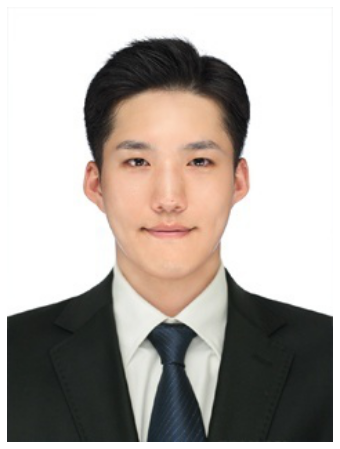

In [89]:
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [90]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(custom_mask) # ÎßàÏä§ÌÅ¨Ïö© ÏÇ¨ÏßÑÏùò ÏÉâÏùÑ ÏûÖÎ†•

# ÏΩîÎ°úÎÇò Ïù¥ÌõÑ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [91]:
from collections import Counter
from wordcloud import WordCloud

{'ÍµêÏàò': 8343, 'ÏÇ¨Îûå': 5617, 'Í≥ºÏ†ú': 4383, 'ÌïôÍ∏∞': 4045, 'Í∞ïÏùò': 3579, 'ÏãúÌóò': 3171, 'ÌïôÍµê': 3004, 'ÏàòÏóÖ': 2890, 'ÌïôÏ†ê': 2624, 'ÏÑ±Ï†Å': 2300, 'ÌïòÎäî': 2061, 'ÎåÄÎ©¥': 1960, 'Ïã†Ï≤≠': 1931, 'Ïñ¥ÎñªÍ≤å': 1907, 'Ï£ºÏ∞®': 1776, 'ÏãúÍ∞Ñ': 1753, 'Ï†ÑÍ≥µ': 1700, 'ÏòÅÏñ¥': 1669, 'Ïò§Îäò': 1646, 'ÌïôÎÖÑ': 1614, 'ÌòπÏãú': 1516, 'ÌñàÎäîÎç∞': 1504, 'ÌïòÎÇò': 1488, 'Ïû•ÌïôÍ∏à': 1471, 'Í≥ºÎ™©': 1423, 'ÏûàÎÇòÏöî': 1420, 'Ï∂îÏ≤ú': 1416, 'Í≥µÎ∂Ä': 1413, 'Í±¥Í∞Ä': 1323, 'Í∞ÄÏöî': 1291, 'Î¨∏Ï†ú': 1240, 'ÏàòÍ∞ïÏã†Ï≤≠': 1143, 'ÏßàÎ¨∏': 1122, 'Í≥µÏßÄ': 1119, 'Ïñ∏Ï†ú': 1085, 'Ï†êÏàò': 1039, 'Ï†ïÎèÑ': 1026, 'ÏπúÍµ¨': 995, 'Ìï¥Ïïº': 995, 'ÏïåÎ∞î': 994, 'ÍµêÏñë': 970, 'Ï†úÏ∂ú': 962, 'ÏûàÎäî': 961, 'ÏûàÏñ¥': 933, 'Ï§ëÍ∞Ñ': 876, 'Î©îÏùº': 871, 'Í∞ôÏùÄÎç∞': 869, 'Í≥ÑÏ†à': 847, 'Ïö∞Î¶¨': 842, 'Í∏∞Í∞Ñ': 842, 'Ìú¥Ìïô': 840, 'Î™ÖÏßÄÎåÄ': 824, 'Ïù¥Ìï¥': 807, 'Îì£Îäî': 782, 'Ï†úÎ∞ú': 770, 'ÌÜ†Ïùµ': 765, 'ÏûàÎäîÎç∞': 765, 'Îì§Ïñ¥': 742, 'Ï°∏ÏóÖ': 742, 'ÏïÑÎãàÎ©¥': 737, 'ÎÇ¥Ïùº': 720, 'Ïã§Í∞ï': 714, 'Ï

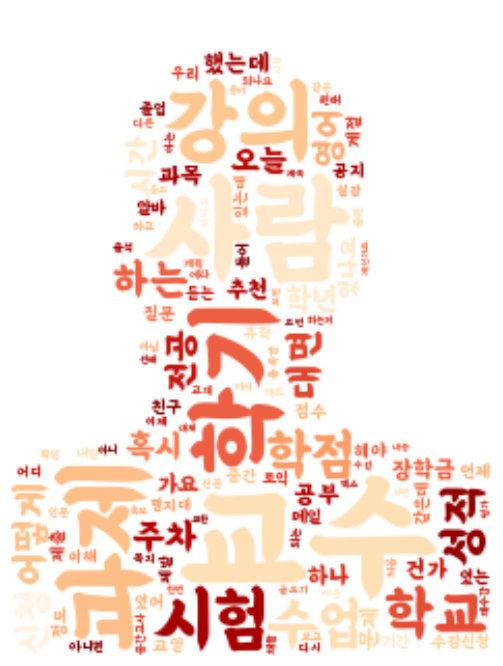

In [92]:
wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=200, mask=custom_mask, # wordÏùò ÏµúÎåÄ Í∞ØÏàòÏôÄ ÎßàÏä§ÌÅ¨, font-sizeÏÑ§Ï†ï
                     max_font_size=70, colormap='OrRd')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # ÎßàÏä§ÌÅ¨Ïö© Ïù¥ÎØ∏ÏßÄÏùò ÏÉâÏúºÎ°ú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
plt.show()

# ÏµúÏ¢Ö ÏàòÏßë Îç∞Ïù¥ÌÑ∞

In [40]:
# ÏΩîÎ°úÎÇò Í≤ÄÏÉâ ÌÇ§ÏõåÎìú Í∏∞Ï§Ä Îç∞Ïù¥ÌÑ∞

pd.read_csv("../data/ÏΩîÎ°úÎÇò_Ïù¥ÌõÑ_Î™ÖÏßÄ.csv")

Unnamed: 0  recommend  comment            date  \
0              0         18        8     01/24 23:07   
1              1          0        5     01/26 10:00   
2              2          0        6     01/26 10:27   
3              3          2        1     01/26 15:26   
4              4          0        9     01/27 10:37   
...          ...        ...      ...             ...   
1952        1952          0        1     11/25 17:36   
1953        1953          0        8     11/25 18:05   
1954        1954          0        8     11/25 19:07   
1955        1955          3        5  18/11/26 20:06   
1956        1956          0        1            8Î∂Ñ Ï†Ñ   

                            title  \
0              ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Ïö∞Ìïú ÌèêÎ†¥ ÏûàÏûñÏïÑ   
1                          ÏΩîÎ°úÎÇòÎïåÎ¨∏Ïóê   
2                        ÏΩîÎ°úÎÇò ÏòàÎ∞©ÏàòÏπô   
3        Ï∂©ÎÇ®ÎèÑ Ïó¨ÌñâÏÇ¨ Í¥ÄÍ¥ëÍ∞ùÏóê ÏñëÌï¥ Íµ¨ÌïòÍ≥† Ï∑®ÏÜåÏöîÏ≤≠   
4                  ÏΩîÎ°úÎÇò ÎïåÎ¨∏Ïóê Í∏ÄÏò¨Î¶ΩÎãàÎã§    
...                           ...   
1952  ÎåÄÎ©¥ÏãúÌóò Í∞úÎ°ú        Ïù¥ÎèôÌï†ÎªîÌñàÎäîÎç∞    Îê®   
1953           ÏΩîÎ°úÎÇòÎïåÎ¨∏Ïóê ÎπÑÎåÄÎ©¥ ÏãúÌóò Î≥¥ÎäîÍ±¥Îç∞   
1954               ÎßàÏä§ÌÅ¨ ÏùòÎ¨¥Ìôî ÏïÑÎãåÍ∞Ä      
1955                Í∞úÏõî ÏπòÏ¶àÎÉ•Ïù¥ Ï£ºÏù∏Íµ¨Ìï¥Ïöî   
1956            ÌïôÎÖÑ ÎßàÏπòÍ≥† Î∞îÎ°ú ÏΩîÎ°úÎÇò ÌÑ∞Ï†∏ÏÑú   

                                                content  
0                      Ïö∞Î¶¨ÌïôÍµê Ï§ëÍµ≠Ïù∏ ÏóÑÏ≤≠ ÎßéÏùÄÎç∞ ÎÇòÎßå Í±±Ï†ïÎèº   „Ñ∑„Ñ∑„Ñ∑„Ñ∑ „Ö†„Ö†  
1                                     ÏïåÎ∞îÌïòÎäîÎç∞ ÏÜêÎãòÏóÜÎã§ „Öã„Öã„Öã„Öã„Öã„Öã  
2     Í∞êÏóºÎ£®Ìä∏Í∞Ä ÎπÑÎßêÍ∞êÏóº Ïù∏ÏßÄÎùº ÎßàÏä§ÌÅ¨Îßå Ïûò Ïì∞Í≥† ÏÜêÎßå Ïûò ÏîªÏúºÎ©¥ ÏòàÎ∞©ÌïòÎäîÍ≤å Í∑∏Îã§ÏßÄ Ïñ¥Î†µ...  
3      ÌôçÏÑ± Ïó∞Ìï©Îâ¥Ïä§  ÏñëÏòÅÏÑù Í∏∞Ïûê    Ïö∞Ìïú ÌèêÎ†¥ ÏúºÎ°ú Î∂àÎ¶¨Îäî Ïã†Ï¢Ö ÏΩîÎ°úÎÇòÎ∞îÏù¥Îü¨Ïä§ ÌôïÏÇ∞...  
4     ÌòπÏãú Ï§ëÍµ≠Ïù∏ Ïú†ÌïôÏÉù Í≥ÑÏÜç Î∞õÏùÑÎ†§ÎÇò  Ïù¥Î≤àÏóê Í∏∞ÏàôÏÇ¨ Îì§Ïñ¥Í∞ÄÎäîÎç∞ Ïù¥Îü¨Î©¥ ÏÜîÏßÅÌûà Í±±Ï†ïÏù¥ ...  
...                                                 ...  
1952  ÏºÄÌÖçÌÉÄÍ≥† Í∞ÄÎäîÍ∏∏Ïóê  ÏΩîÎ°úÎÇò Í±∏Î¶¥ÍπåÎ¥ê Î™®ÏûêÎùºÎèÑ ÏÇ¥ÎùºÌñàÎìúÎßå  Îã§ ÎπÑÎåÄÎ©¥ÎïåÎ¶¨ÎÑ§ Î™®Îì† ÏãúÌóò...  
1953  Í≥ºÏ†úÎ•º ÌïôÍµêÏóê ÏôÄÏÑú ÎÇ¥Í≥† Í∞ÄÎùºÍ≥†   „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã ÏóÑÏ≤≠ÎÇò...  
1954                 Ïñ¥Î•¥Ïã†Îì§ ÎÑàÎ¨¥ ÎåÄÎÜìÍ≥† ÏïàÏì∞Í≥† ÎãπÎãπÌïòÍ≤å Îã§ÎãàÏÖîÏÑú ÏΩîÎ°úÎÇò ÎÅùÎÇú Ï§Ñ  
1955    Í∞úÏõî ÏπòÏ¶àÎÉ•Ïù¥Ïùò Ï£ºÏù∏ÏùÑ Ï∞æÏïÑÏöî  ÏûêÏ∫† ÏûêÏ∑®Îü¨ ÌòπÏùÄ Ïö©Ïù∏Ïóê ÏÇ¨ÏãúÎäî Î∂ÑÎì§ Ï§ëÏóê Í≥†Ïñë...  
1956  ÏïÑÏßÅÎèÑ ÎÇ¥Í∞Ä  ÌïôÎÖÑ Í∞ôÏïÑ    ÌõÑÎ∞∞    ÎãòÎì§    Ïûò ÏÇ¥ÏïÑÏûàÎÇòÏöî     Î≥¥Í≥†Ïã∂Îã§ ...  

[1957 rows x 6 columns]

In [38]:
# ÏΩîÎ°úÎÇò Ïù¥ÌõÑ Ï†ÑÏ≤¥ SNS Îç∞Ïù¥ÌÑ∞

pd.read_csv("../data/ÏΩîÎ°úÎÇòÏù¥ÌõÑÎ™ÖÏßÄ_final.csv")

Unnamed: 0  vote  data      comment                  title  \
0               0     0     5         5Î∂Ñ Ï†Ñ                  Î∞ëÏóê Ïï†Í∞Ä   
1               1     0    54        13Î∂Ñ Ï†Ñ                ÎÅùÎßêÏûáÍ∏∞Ìï†ÏÇ¨Îûå   
2               2     0     7        20Î∂Ñ Ï†Ñ                ÎÆ§ÏßÄÏª¨Î≥∏Îã§ÌïòÎ©¥   
3               3     0     0        26Î∂Ñ Ï†Ñ             Í∏ÄÍ≤ΩÏ†Ñ Ïù¥Ï†ïÌôòÍµêÏàòÎãò   
4               4     0     0        29Î∂Ñ Ï†Ñ            Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„ÖáÍµêÏàòÎãò   
...           ...   ...   ...          ...                    ...   
50455       18455     0     1  06/16 17:52    Ìï®Î∞ïÍ¥Ä Ï∂úÍµ¨ Ïñ¥ÎîîÏïº ÏïåÎ†§Ï£ºÏÑ∏Ïöî...   
50456       18456     0     1  06/16 17:48  Ìï®Î∞ïÍ¥Ä Ï∞®ÏÑ∏ÎåÄÎÇò Ï∞ΩÏ°∞ÏòàÏà†Í¥Ä Í∑ºÏ≤òÏù∏Í∞ÄÏö©?   
50457       18457     0     0  06/16 17:45                    Îä¶Í≤†ÎàÑ   
50458       18458     0     0  06/16 17:44                    „Öà„Ñ±„Ñ¥   
50459       18459     0     1  06/16 17:36             ÌïôÍµê ÎèÑÏÑúÍ¥Ä Ïó¥ÎûåÏã§   

                                         content  
0                              Î¨∏Ïû•ÎÅùÎßêÏûáÍ∏∞ ÏïàÌï¥Ï§å Ìï¥Ï§ÑÏÇ¨Îûå..  
1                               ÎÅùÏû•Îã®Ïñ¥ÎßêÍ≥† Ïñ¥Î†§Ïö¥Îã®Ïñ¥Ïì∞ÏßÄÎßêÍ≥†  
2                                     ÌôçÍ¥ëÌò∏ vs Ï°∞ÏäπÏö∞  
3                             Í∞úÏù∏ÌîÑÎ°úÏ†ùÌä∏ Í∏∞ÏóÖÎ≠òÎ°úÌï¥ÏïºÎêòÎÇò..„Öú  
4      Ïú†ÎùºÏãúÏïÑ „Öä„ÖÅ„Öá ÍµêÏàòÎãò 13Ï£ºÏ∞® Í≥ºÏ†ú  Í∏∞ÎßêÍ≥†ÏÇ¨ ÏòàÏÉÅÎ¨∏Ï†ú Î™áÍ∞ú ÎÇ¥ÏïºÌï¥Ïöî??  
...                                          ...  
50455                            Îß¥Îß¥ ÎèåÍ≥† ÏûàÏñ¥Ïöî... „Öã„Öã  
50456                                       ÏïÑÏïÑ„Ö†„Ö†  
50457                       Îπ®Í∞ÑÎ≤ÑÏä§Ïù∏Îç∞ ÏßÄÍ∏à ÏåçÏö©ÏïÑÌååÌä∏ÎÑ§...Ìïò  
50458                             kcuÏÑ±Ï†ÅÌôïÏù∏ Ïñ¥Ï∫êÌïòÎÇòÏöî?  
50459                                    Ïó¥Î†§ÏûàÎÇòÏöî??  

[50460 rows x 6 columns]

In [37]:
# ÏΩîÎ°úÎÇò Ïù¥Ï†Ñ Ï†ÑÏ≤¥ SNS Îç∞Ïù¥ÌÑ∞

pd.read_csv("../data/ÏΩîÎ°úÎÇòÏù¥Ï†ÑÎ™ÖÏßÄ_final.csv")

Unnamed: 0  vote  data         comment  \
0               0     0     2     01/01 01:10   
1               1     0     0     01/01 01:03   
2               2    15     3     01/01 00:38   
3               3     0     6     01/01 00:31   
4               4     0     2     01/01 00:31   
...           ...   ...   ...             ...   
33095       15755     0     3  19/06/13 15:53   
33096       15756     0     3  19/06/13 15:49   
33097       15757     0     3  19/06/13 15:32   
33098       15758     0     8  19/06/13 15:31   
33099       15759     0     7  19/06/13 15:15   

                                     title  \
0                                   Î∞òÏò§Ïã≠Ïù¥Ïó¨!   
1                            Î™®Îëê Ìï¥Ìîº Îâ¥ Ïù¥Ïñ¥!!!   
2                           Îã§Îì§ ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏïÑÏöî   
3      ÏòàÏ≤¥Îä• Ï™ΩÏúºÎ°ú ÌÜ± Ï∞çÏùÄ ÏÇ¨ÎûåÏù¥ Í∑∏ Î®∏Î¶¨+ÎÖ∏Î†•ÏúºÎ°ú Í≥µÎ∂ÄÎèÑ ÏûòÌï†Íπå?   
4                         ÏßßÍ≥† ÍµµÏùÄ ÏÉàÌï¥ Ïù∏ÏÇ¨Îßê Ï∂îÏ≤úÏ¢Ä   
...                                    ...   
33095                       Î™ÖÏßÄÎåÄÏóêÏÑú Ïö©ÌÑ∞ÍπåÏßÄ Î¨¥Î£åÎ©¥   
33096               ÏßÄÍ∞ëÏ£ºÏõåÏÑú Í∏ÄÏò¨Î†∏ÎäîÎç∞ Ï£ºÏù∏Ïù¥ÏïàÎÇòÌÉÄÎÇòÏöî,,   
33097                 Í≥µÌïôÌäπÎ°† ÏàòÏóÖÏùÄ ÏûàÏùå. ÏÑ±Ï†ÅÏóî ÏïàÎì§Í∞ê   
33098                           Î©¥Ï†ë Í≤ΩÏüÅÎ•† 4:1   
33099                              ÎÇú Ï¢ÖÍ∞ï „Öã„Öã   

                                                 content  
0                                                 ÏùºÏñ¥ÎÇòÎùº!!  
1                                            ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏïÑÎûë  
2                                                   ‚ô•Ô∏èüôèüèª  
3      Ïñ¥Ï†ú Ïö∞Î¶¨ ÌòïÏù¥Îûë ÎÖºÏüÅÌï®. ÎÇòÎäî ÏñëÏûêÍ∞Ä ÏïÑÏòà Îã§Î•∏ ÏòÅÏó≠Ïù¥Îùº ÏòàÏà†ÏóêÏÑú ÌÜ± Ï∞çÏñ¥ÎèÑ Í≥µÎ∂Ä...  
4                                 Ìï¥ÌîºÎâ¥Ïù¥Ïñ¥, ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏúºÏÑ∏Ïöî ÎßêÍ≥†  
...                                                  ...  
33095                                   Ïö©ÌÑ∞ÏóêÏÑú Î™ÖÏßÄÎåÄÍπåÏßÄÎèÑ Î¨¥Î£åÏ£†?  
33096                                   Ïñ¥ÎîîÎ°ú Î≥¥ÎÇ¥ÏïºÌï†ÍπåÏöî Í≥ºÏÇ¨,,?  
33097                                                  ÎÅù  
33098                 ÏùëÏãúÏûê ÌèâÍ∑†Ïó∞Î†π 30ÎåÄ Ï§ëÎ∞ò  ÎÇò 20ÎåÄÏ§ëÎ∞ò Í∞ÄÎä•ÏÑ±ÏûàÏñ¥Î≥¥Ïù¥ÎÉê?  
33099                                                 „ÖÇ„ÖÇ  

[33100 rows x 6 columns]

In [93]:
before = pd.read_csv("../data/ÏΩîÎ°úÎÇòÏù¥Ï†ÑÎ™ÖÏßÄ_final.csv")

In [94]:
before

Unnamed: 0  vote  data         comment  \
0               0     0     2     01/01 01:10   
1               1     0     0     01/01 01:03   
2               2    15     3     01/01 00:38   
3               3     0     6     01/01 00:31   
4               4     0     2     01/01 00:31   
...           ...   ...   ...             ...   
33095       15755     0     3  19/06/13 15:53   
33096       15756     0     3  19/06/13 15:49   
33097       15757     0     3  19/06/13 15:32   
33098       15758     0     8  19/06/13 15:31   
33099       15759     0     7  19/06/13 15:15   

                                     title  \
0                                   Î∞òÏò§Ïã≠Ïù¥Ïó¨!   
1                            Î™®Îëê Ìï¥Ìîº Îâ¥ Ïù¥Ïñ¥!!!   
2                           Îã§Îì§ ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏïÑÏöî   
3      ÏòàÏ≤¥Îä• Ï™ΩÏúºÎ°ú ÌÜ± Ï∞çÏùÄ ÏÇ¨ÎûåÏù¥ Í∑∏ Î®∏Î¶¨+ÎÖ∏Î†•ÏúºÎ°ú Í≥µÎ∂ÄÎèÑ ÏûòÌï†Íπå?   
4                         ÏßßÍ≥† ÍµµÏùÄ ÏÉàÌï¥ Ïù∏ÏÇ¨Îßê Ï∂îÏ≤úÏ¢Ä   
...                                    ...   
33095                       Î™ÖÏßÄÎåÄÏóêÏÑú Ïö©ÌÑ∞ÍπåÏßÄ Î¨¥Î£åÎ©¥   
33096               ÏßÄÍ∞ëÏ£ºÏõåÏÑú Í∏ÄÏò¨Î†∏ÎäîÎç∞ Ï£ºÏù∏Ïù¥ÏïàÎÇòÌÉÄÎÇòÏöî,,   
33097                 Í≥µÌïôÌäπÎ°† ÏàòÏóÖÏùÄ ÏûàÏùå. ÏÑ±Ï†ÅÏóî ÏïàÎì§Í∞ê   
33098                           Î©¥Ï†ë Í≤ΩÏüÅÎ•† 4:1   
33099                              ÎÇú Ï¢ÖÍ∞ï „Öã„Öã   

                                                 content  
0                                                 ÏùºÏñ¥ÎÇòÎùº!!  
1                                            ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏïÑÎûë  
2                                                   ‚ô•Ô∏èüôèüèª  
3      Ïñ¥Ï†ú Ïö∞Î¶¨ ÌòïÏù¥Îûë ÎÖºÏüÅÌï®. ÎÇòÎäî ÏñëÏûêÍ∞Ä ÏïÑÏòà Îã§Î•∏ ÏòÅÏó≠Ïù¥Îùº ÏòàÏà†ÏóêÏÑú ÌÜ± Ï∞çÏñ¥ÎèÑ Í≥µÎ∂Ä...  
4                                 Ìï¥ÌîºÎâ¥Ïù¥Ïñ¥, ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏúºÏÑ∏Ïöî ÎßêÍ≥†  
...                                                  ...  
33095                                   Ïö©ÌÑ∞ÏóêÏÑú Î™ÖÏßÄÎåÄÍπåÏßÄÎèÑ Î¨¥Î£åÏ£†?  
33096                                   Ïñ¥ÎîîÎ°ú Î≥¥ÎÇ¥ÏïºÌï†ÍπåÏöî Í≥ºÏÇ¨,,?  
33097                                                  ÎÅù  
33098                 ÏùëÏãúÏûê ÌèâÍ∑†Ïó∞Î†π 30ÎåÄ Ï§ëÎ∞ò  ÎÇò 20ÎåÄÏ§ëÎ∞ò Í∞ÄÎä•ÏÑ±ÏûàÏñ¥Î≥¥Ïù¥ÎÉê?  
33099                                                 „ÖÇ„ÖÇ  

[33100 rows x 6 columns]

In [95]:
del before["Unnamed: 0"]

In [96]:
before.columns=['recommend','comment','date','title','content']

In [97]:
before['title'] = before['title'].str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£]"," ") # ÌïúÍ∏ÄÏù¥ ÏïÑÎãàÎ©¥ Ï†ÑÎ∂Ä Ï†úÍ±∞
before['content'] = before['content'].str.replace("[^„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£]"," ") # ÌïúÍ∏ÄÏù¥ ÏïÑÎãàÎ©¥ Ï†ÑÎ∂Ä Ï†úÍ±∞

In [98]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = before
train_data[:30] # ÏÉÅÏúÑ 5Í∞ú Ï∂úÎ†•

recommend  comment            date                                title  \
0           0        2     01/01 01:10                               Î∞òÏò§Ïã≠Ïù¥Ïó¨    
1           0        0     01/01 01:03                        Î™®Îëê Ìï¥Ìîº Îâ¥ Ïù¥Ïñ¥      
2          15        3     01/01 00:38                       Îã§Îì§ ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏïÑÏöî   
3           0        6     01/01 00:31  ÏòàÏ≤¥Îä• Ï™ΩÏúºÎ°ú ÌÜ± Ï∞çÏùÄ ÏÇ¨ÎûåÏù¥ Í∑∏ Î®∏Î¶¨ ÎÖ∏Î†•ÏúºÎ°ú Í≥µÎ∂ÄÎèÑ ÏûòÌï†Íπå    
4           0        2     01/01 00:31                     ÏßßÍ≥† ÍµµÏùÄ ÏÉàÌï¥ Ïù∏ÏÇ¨Îßê Ï∂îÏ≤úÏ¢Ä   
5           1        3     01/01 00:18                        ÏïÑÌïò Í∑∏ÎûòÏÑú Ïπ¥ÌÜ°ÏïàÏôìÍµ¨ÎÇò   
6           0        0     01/01 00:17                             Ï†ÑÍ≥ºÌï† ÏòàÏ†ïÏù¥Î©¥   
7           0        0     01/01 00:16               Ï¥àÎî©Îïå     ÎÖÑÏùÄ ÌÉÄÏûÑÏ∫°ÏäêÏóê Ïç®ÎÜ®ÏóàÎäîÎç∞   
8           0        1     01/01 00:15                               Ïπ¥ÌÜ° ÌÑ∞Ï°åÎÑ§   
9           0        5     01/01 00:10                    ÏïÑÎÇò   ÌïôÎ≤àÏù∏Îç∞ ÌôîÏÑùÏù¥ÎÉêÏù¥Ï†ú    
10          3        4     01/01 00:02                                    Ïïº   
11          1        0     01/01 00:00                                Ìï¥ÌîºÎâ¥Ïù¥Ïñ¥   
12          2        7  19/12/31 23:49                      Ï¢ãÏïòÎçò ÍµêÏñëÍ≥ºÎ™©  Ïç®Î≥¥Ïüà     
13          1        1  19/12/31 23:49                          ÎÖÑÏùÄ Ï†úÎåÄÎ°ú ÏÇ¥ÏïÑÎ≥ºÍ≤å   
14          0        2  19/12/31 23:16                                  Ïπ¥Ìà¨ÏÇ¨   
15          0        3  19/12/31 23:15                              Ï†úÏïºÏùò Ï¢ÖÏÜåÎ¶¨   
16          0        4  19/12/31 23:11                         ÌïúÏõÖÌù¨ ÏÜåÌñâ Îñ¥Ïùå ÏßÑÏßú   
17          0        5  19/12/31 23:01                                ÏúµÏÜå Ïù∏Ïãù   
18          0        1  19/12/31 23:00               ÏÜêÍ∞ÄÎùΩ Î™áÎ≤à ÍπåÎî±ÌïòÎ©¥ ÏÉàÌï¥Ïù∏ÏÇ¨Í∞Ä Í∞ÄÎä•ÌïúÎç∞   
19         13        1  19/12/31 22:24                           Ïù¥Ï†ú Íµ∞ÎåÄ Í∞ÄÏïºÏßÄ    
20          0        4  19/12/31 22:19                            Ìï∏ÎìúÌè∞ ÎßêÍ≥† Ï∑®ÎØ∏   
21          3        0  19/12/31 22:18                       Ìïú Ìï¥ÎèôÏïà Í≥†ÏÉùÎßéÏúºÏÖ®ÏäµÎãàÎã§   
22          1        0  19/12/31 22:06                   ÎÖÑÏóêÎäî ÍµêÎÇ¥ ÏÇ¨Í±¥ÏÇ¨Í≥† Ï¢Ä ÏóÜÍ∏∏     
23          1       15  19/12/31 22:03                              Î∂ÄÎ™®ÎãòÏù¥ Î∞âÎã§   
24          0        1  19/12/31 21:54                            ÏßÑÏßú Í∞úÏî®Î∞úÍ∞ôÏïòÎã§   
25          0       10  19/12/31 21:54                           ÏõÖÌù¨Ìòï ÏÜåÌñâÎ°†Îñ¥Ïñ¥    
26          5        0  19/12/31 21:42                        ÎÖÑ  ÏãúÍ∞Ñ Î∞òÎèÑ ÏïàÎÇ®ÏïòÎã§   
27          0        5  19/12/31 21:42                          Í≤ΩÏòÅÏù∏Îç∞ Î¨∏Ï†ïÍ≥º Î≥µÏ†Ñ   
28          0        1  19/12/31 21:30                              Í≥ÑÏ†àÌïôÍ∏∞ Ïù∏Í∞ï   
29          0        4  19/12/31 21:04                    Ïù¥Ïû¨ÏÑ±ÍµêÏàòÎãò Ïù¥ÏùòÏã†Ï≤≠ÌïúÏÇ¨ÎûåÏûàÏùå    

                                              content  
0                                              ÏùºÏñ¥ÎÇòÎùº    
1                                         ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏïÑÎûë  
2                                                      
3   Ïñ¥Ï†ú Ïö∞Î¶¨ ÌòïÏù¥Îûë ÎÖºÏüÅÌï®  ÎÇòÎäî ÏñëÏûêÍ∞Ä ÏïÑÏòà Îã§Î•∏ ÏòÅÏó≠Ïù¥Îùº ÏòàÏà†ÏóêÏÑú ÌÜ± Ï∞çÏñ¥ÎèÑ Í≥µÎ∂Ä...  
4                              Ìï¥ÌîºÎâ¥Ïù¥Ïñ¥  ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏúºÏÑ∏Ïöî ÎßêÍ≥†  
5                                              Í∑∏Îüº Í∑∏Îü¨Ïπò  
6              Ïù¥Î≤àÏóê ÌïôÏ†êÏûòÎ∞õÏïóÏñ¥ÎèÑ Ïû•ÌïôÍ∏àÏã†Ï≤≠Î™ªÌïòÏ£†  Í∞Å Í≥ºÎ≥ÑÎ°ú Ïû•ÌïôÍ∏àÏ£ºÎäîÍ±∞ÎãàÍπå    
7                                  Î≤åÏç®   ÎåÄ ÌõÑÎ∞òÏù¥ÎÑ§ ÌõÑ „Ö†„Öã„Öã„Öã  
8                                            Ïïà Î≥¥ÎÇ¥Ïßê „Öã„Öã  
9                                           ÏïÑÏßÅÏùÄ ÏïÑÎãàÍ≤†ÏßÄ   
10                                       Ïπ¥ÌÜ° Î°úÎî© ÎÇòÎßå Ïù¥Îü¨ÎÉê  
11                                            Î™®Îëê ÌñâÎ≥µÌïòÍ∏∏  
12      

In [99]:
train_data.dropna()

recommend  comment            date  \
0              0        2     01/01 01:10   
1              0        0     01/01 01:03   
2             15        3     01/01 00:38   
3              0        6     01/01 00:31   
4              0        2     01/01 00:31   
...          ...      ...             ...   
33095          0        3  19/06/13 15:53   
33096          0        3  19/06/13 15:49   
33097          0        3  19/06/13 15:32   
33098          0        8  19/06/13 15:31   
33099          0        7  19/06/13 15:15   

                                     title  \
0                                   Î∞òÏò§Ïã≠Ïù¥Ïó¨    
1                            Î™®Îëê Ìï¥Ìîº Îâ¥ Ïù¥Ïñ¥      
2                           Îã§Îì§ ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏïÑÏöî   
3      ÏòàÏ≤¥Îä• Ï™ΩÏúºÎ°ú ÌÜ± Ï∞çÏùÄ ÏÇ¨ÎûåÏù¥ Í∑∏ Î®∏Î¶¨ ÎÖ∏Î†•ÏúºÎ°ú Í≥µÎ∂ÄÎèÑ ÏûòÌï†Íπå    
4                         ÏßßÍ≥† ÍµµÏùÄ ÏÉàÌï¥ Ïù∏ÏÇ¨Îßê Ï∂îÏ≤úÏ¢Ä   
...                                    ...   
33095                       Î™ÖÏßÄÎåÄÏóêÏÑú Ïö©ÌÑ∞ÍπåÏßÄ Î¨¥Î£åÎ©¥   
33096               ÏßÄÍ∞ëÏ£ºÏõåÏÑú Í∏ÄÏò¨Î†∏ÎäîÎç∞ Ï£ºÏù∏Ïù¥ÏïàÎÇòÌÉÄÎÇòÏöî     
33097                 Í≥µÌïôÌäπÎ°† ÏàòÏóÖÏùÄ ÏûàÏùå  ÏÑ±Ï†ÅÏóî ÏïàÎì§Í∞ê   
33098                           Î©¥Ï†ë Í≤ΩÏüÅÎ•†       
33099                              ÎÇú Ï¢ÖÍ∞ï „Öã„Öã   

                                                 content  
0                                                 ÏùºÏñ¥ÎÇòÎùº    
1                                            ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏïÑÎûë  
2                                                         
3      Ïñ¥Ï†ú Ïö∞Î¶¨ ÌòïÏù¥Îûë ÎÖºÏüÅÌï®  ÎÇòÎäî ÏñëÏûêÍ∞Ä ÏïÑÏòà Îã§Î•∏ ÏòÅÏó≠Ïù¥Îùº ÏòàÏà†ÏóêÏÑú ÌÜ± Ï∞çÏñ¥ÎèÑ Í≥µÎ∂Ä...  
4                                 Ìï¥ÌîºÎâ¥Ïù¥Ïñ¥  ÏÉàÌï¥ Î≥µ ÎßéÏù¥ Î∞õÏúºÏÑ∏Ïöî ÎßêÍ≥†  
...                                                  ...  
33095                                   Ïö©ÌÑ∞ÏóêÏÑú Î™ÖÏßÄÎåÄÍπåÏßÄÎèÑ Î¨¥Î£åÏ£†   
33096                                   Ïñ¥ÎîîÎ°ú Î≥¥ÎÇ¥ÏïºÌï†ÍπåÏöî Í≥ºÏÇ¨     
33097                                                  ÎÅù  
33098                 ÏùëÏãúÏûê ÌèâÍ∑†Ïó∞Î†π   ÎåÄ Ï§ëÎ∞ò  ÎÇò   ÎåÄÏ§ëÎ∞ò Í∞ÄÎä•ÏÑ±ÏûàÏñ¥Î≥¥Ïù¥ÎÉê   
33099                                                 „ÖÇ„ÖÇ  

[33100 rows x 5 columns]

In [100]:
word_list = []

for i in train_data.title:
    word_list.append(i)
for i in train_data.content:
    word_list.append(i)

In [101]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [102]:
sentences_tag

[[('Î∞ò', 'Modifier'), ('Ïò§Ïã≠', 'Noun'), ('Ïù¥Ïó¨', 'Josa')],
 [('Î™®Îëê', 'Noun'), ('Ìï¥Ìîº', 'Noun'), ('Îâ¥', 'Noun'), ('Ïù¥Ïñ¥', 'Verb')],
 [('Îã§', 'Adverb'),
  ('Îì§', 'Verb'),
  ('ÏÉàÌï¥', 'Noun'),
  ('Î≥µ', 'Noun'),
  ('ÎßéÏù¥', 'Adverb'),
  ('Î∞õÏïÑÏöî', 'Verb')],
 [('ÏòàÏ≤¥Îä•', 'Noun'),
  ('Ï™Ω', 'Noun'),
  ('ÏúºÎ°ú', 'Josa'),
  ('ÌÜ±', 'Noun'),
  ('Ï∞çÏùÄ', 'Verb'),
  ('ÏÇ¨Îûå', 'Noun'),
  ('Ïù¥', 'Josa'),
  ('Í∑∏', 'Noun'),
  ('Î®∏Î¶¨', 'Noun'),
  ('ÎÖ∏Î†•', 'Noun'),
  ('ÏúºÎ°ú', 'Josa'),
  ('Í≥µÎ∂Ä', 'Noun'),
  ('ÎèÑ', 'Josa'),
  ('Ïûò', 'VerbPrefix'),
  ('Ìï†Íπå', 'Verb')],
 [('ÏßßÍ≥†', 'Adjective'),
  ('ÍµµÏùÄ', 'Adjective'),
  ('ÏÉàÌï¥', 'Noun'),
  ('Ïù∏ÏÇ¨Îßê', 'Noun'),
  ('Ï∂îÏ≤ú', 'Noun'),
  ('Ï¢Ä', 'Noun')],
 [('ÏïÑÌïò', 'Noun'),
  ('Í∑∏ÎûòÏÑú', 'Adverb'),
  ('Ïπ¥ÌÜ°', 'Noun'),
  ('ÏïàÏôì', 'Noun'),
  ('Íµ¨ÎÇò', 'Noun')],
 [('Ï†ÑÍ≥º', 'Noun'), ('Ìï†', 'Verb'), ('ÏòàÏ†ï', 'Noun'), ('Ïù¥Î©¥', 'Noun')],
 [('Ï¥àÎî©', 'Noun'),
  ('Îïå', 'Noun'),
  ('ÎÖÑ', 'Noun'),
  ('

In [103]:
# Î™ÖÏÇ¨, ÎèôÏÇ¨, ÌòïÏö©ÏÇ¨ ÏÇ¨Ïö©

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun","Verb","Adjective"]:
            noun_list.append(word)

In [104]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:]

['Ïò§Ïã≠',
 'Î™®Îëê',
 'Ìï¥Ìîº',
 'Ïù¥Ïñ¥',
 'ÏÉàÌï¥',
 'Î∞õÏïÑÏöî',
 'ÏòàÏ≤¥Îä•',
 'Ï∞çÏùÄ',
 'ÏÇ¨Îûå',
 'Î®∏Î¶¨',
 'ÎÖ∏Î†•',
 'Í≥µÎ∂Ä',
 'Ìï†Íπå',
 'ÏßßÍ≥†',
 'ÍµµÏùÄ',
 'ÏÉàÌï¥',
 'Ïù∏ÏÇ¨Îßê',
 'Ï∂îÏ≤ú',
 'ÏïÑÌïò',
 'Ïπ¥ÌÜ°',
 'ÏïàÏôì',
 'Íµ¨ÎÇò',
 'Ï†ÑÍ≥º',
 'ÏòàÏ†ï',
 'Ïù¥Î©¥',
 'Ï¥àÎî©',
 'ÌÉÄÏûÑÏ∫°Ïäê',
 'Ïç®ÎÜ®ÏóàÎäîÎç∞',
 'Ïπ¥ÌÜ°',
 'ÌÑ∞Ï°åÎÑ§',
 'ÌïôÎ≤à',
 'ÌôîÏÑù',
 'Ïù¥Ï†ú',
 'Ìï¥ÌîºÎâ¥Ïù¥Ïñ¥',
 'Ï¢ãÏïòÎçò',
 'ÍµêÏñëÍ≥ºÎ™©',
 'Ïç®Î≥¥Ïüà',
 'Ï†úÎåÄÎ°ú',
 'Ïπ¥Ìà¨ÏÇ¨',
 'Ï†úÏïº',
 'Ï¢ÖÏÜåÎ¶¨',
 'ÌïúÏõÖ',
 'ÏÜåÌñâ',
 'Îñ¥Ïùå',
 'ÏßÑÏßú',
 'ÏúµÏÜå',
 'Ïù∏Ïãù',
 'ÏÜêÍ∞ÄÎùΩ',
 'Î™áÎ≤à',
 'ÍπåÎî±',
 'ÌïòÎ©¥',
 'ÏÉàÌï¥Ïù∏ÏÇ¨',
 'Í∞ÄÎä•ÌïúÎç∞',
 'Ïù¥Ï†ú',
 'Íµ∞ÎåÄ',
 'Í∞ÄÏïº',
 'Ìï∏ÎìúÌè∞',
 'Ï∑®ÎØ∏',
 'Ìï¥Îèô',
 'Í≥†ÏÉù',
 'ÎßéÏúºÏÖ®ÏäµÎãàÎã§',
 'ÍµêÎÇ¥',
 'ÏÇ¨Í±¥',
 'ÏÇ¨Í≥†',
 'ÏóÜÍ∏∏',
 'Î∂ÄÎ™®Îãò',
 'Î∞âÎã§',
 'ÏßÑÏßú',
 'Ïî®Î∞ú',
 'Í∞ôÏïòÎã§',
 'ÏõÖÌù¨Ìòï',
 'ÏÜåÌñâ',
 'Îñ¥Ïñ¥',
 'ÏãúÍ∞Ñ',
 'Î∞òÎèÑ',
 'ÏïàÎÇ®ÏïòÎã§',
 'Í≤ΩÏòÅ',
 'Î¨∏Ï†ï',
 'Î≥µÏ†Ñ',
 'Í≥ÑÏ†à',
 'ÌïôÍ∏∞',
 'Ïù∏Í∞

In [114]:
counts = Counter(noun_list)
tags = counts.most_common(200)
tags

[('ÍµêÏàò', 4527),
 ('ÏÇ¨Îûå', 2994),
 ('ÏãúÌóò', 2275),
 ('ÏàòÏóÖ', 2107),
 ('ÌïôÍµê', 1933),
 ('Ïò§Îäò', 1732),
 ('ÌïôÍ∏∞', 1508),
 ('ÏßÑÏßú', 1252),
 ('ÌïòÎäî', 1193),
 ('ÏÑ±Ï†Å', 1116),
 ('ÌïôÏ†ê', 1089),
 ('ÏãúÍ∞Ñ', 1066),
 ('ÏûàÎÇòÏöî', 1007),
 ('Ïñ∏Ï†ú', 1000),
 ('Í≥µÎ∂Ä', 999),
 ('Í≥ºÏ†ú', 991),
 ('Ïñ¥ÎñªÍ≤å', 915),
 ('ÏòÅÏñ¥', 901),
 ('ÏßÄÍ∏à', 852),
 ('Ïù¥Î≤à', 849),
 ('ÌïòÎ©¥', 809),
 ('ÌòπÏãú', 807),
 ('Ïã†Ï≤≠', 805),
 ('Ïñ¥Îîî', 758),
 ('ÌïòÎÇò', 758),
 ('Ìï¥ÏÑú', 724),
 ('Í≥ÑÏ†à', 696),
 ('Í∑∏ÎÉ•', 692),
 ('Ï∂îÏ≤ú', 691),
 ('ÌïôÎÖÑ', 689),
 ('Î¨∏Ï†ú', 689),
 ('ÏÉùÍ∞Å', 677),
 ('Ï±ÑÌîå', 660),
 ('Ïö∞Î¶¨', 646),
 ('ÌñàÎäîÎç∞', 639),
 ('ÎÇ¥Ïùº', 635),
 ('Í∞ÄÏöî', 634),
 ('Ï™ΩÏßÄ', 630),
 ('Ï†êÏàò', 617),
 ('Ï†ïÎèÑ', 611),
 ('ÏûàÎäî', 606),
 ('Î™ÖÏßÄÎåÄ', 604),
 ('Í∞ïÏùò', 601),
 ('ÌïòÎäîÎç∞', 589),
 ('Ï†ÑÍ≥µ', 579),
 ('Ïã†Î∂Ñ', 576),
 ('ÏπúÍµ¨', 553),
 ('ÏïÑÏãú', 538),
 ('Ïó¨Ïûê', 536),
 ('Ï†úÎ∞ú', 525),
 ('ÎÇ®Ïûê', 520),
 ('Ïù¥Ìï¥', 496),
 ('Ï§ëÍ∞Ñ', 488),
 ('Ïù∏Í∞ï', 486),

In [115]:
tags = dict(tags)

In [116]:
tags.pop('ÏΩîÎ°úÎÇò')
tags.pop('ÌïôÍ∏∞')
tags.pop('ÏßÑÏßú')
tags.pop('ÏÉùÍ∞Å')
tags.pop('ÌïòÎäî')
tags.pop('ÏßÄÍ∏à')
tags.pop('ÏûÖÎãàÎã§')
tags.pop('Ïù¥Î≤à')
tags.pop('Ïö∞Î¶¨')
tags.pop('ÏßÑÏûê')
tags.pop('Ìï¥ÏÑú')
tags.pop('Í¥ÄÎ†®')
tags.pop('ÌïòÎ©¥')
tags.pop('ÏõêÎûò')
tags.pop('ÌñàÎäîÎç∞')
tags.pop('Î™ÖÎåÄ')
tags.pop('ÌïòÎäîÎç∞')
tags.pop('ÎßåÏõê')
tags.pop('Ï†ïÎèÑ')
tags.pop('ÏïÑÎãà')
tags.pop('ÌòπÏãú')

KeyError: 'ÏΩîÎ°úÎÇò'

In [ ]:
tags

In [ ]:
tags.pop('Î≥¥Í≥†')
tags.pop('Ïñ¥ÎñªÍ≤å')
tags.pop('Í∑∏ÎÉ•')
tags.pop('Í≥µÏßÄ')
tags.pop('Í∞ôÏùÄÎç∞')
tags.pop('ÏûàÎäî')
tags.pop('ÏÉÅÌô©')
tags.pop('Ïù¥Ïú†')
tags.pop('ÌïôÎÖÑ')
tags.pop('Í∏∞ÏÇ¨')
tags.pop('Ìï¥Ïïº')
tags.pop('ÏïàÎÖïÌïòÏÑ∏Ïöî')
tags.pop('Ìï©ÎãàÎã§')
tags.pop('Í∏∞Ï§Ä')
tags.pop('ÏùºÎã®')
tags.pop('ÌïúÎ≤à')
tags.pop('Ïù¥Ï†ú')
tags.pop('ÎåÄÌïú')
tags.pop('ÎêòÎäî')

In [ ]:
tags

In [111]:
tags.pop('ÏûàÎäîÎç∞')
tags.pop('Í∞ÄÏÑú')
tags.pop('ÌïòÍ≥†')
tags.pop('Î≥¥ÎèÑ')
tags.pop('Í≥ºÎ™©')
tags.pop('Í∞ôÏùÄ')

455

In [112]:
tags.pop('ÎπÑÎåÄ')
tags['ÎπÑÎåÄÎ©¥']=22

KeyError: 'ÎπÑÎåÄ'

{'ÍµêÏàò': 4527, 'ÏÇ¨Îûå': 2994, 'ÏãúÌóò': 2275, 'ÏàòÏóÖ': 2107, 'ÌïôÍµê': 1933, 'Ïò§Îäò': 1732, 'ÌïôÍ∏∞': 1508, 'ÏßÑÏßú': 1252, 'ÌïòÎäî': 1193, 'ÏÑ±Ï†Å': 1116, 'ÌïôÏ†ê': 1089, 'ÏãúÍ∞Ñ': 1066, 'ÏûàÎÇòÏöî': 1007, 'Ïñ∏Ï†ú': 1000, 'Í≥µÎ∂Ä': 999, 'Í≥ºÏ†ú': 991, 'Ïñ¥ÎñªÍ≤å': 915, 'ÏòÅÏñ¥': 901, 'ÏßÄÍ∏à': 852, 'Ïù¥Î≤à': 849, 'ÌïòÎ©¥': 809, 'ÌòπÏãú': 807, 'Ïã†Ï≤≠': 805, 'Ïñ¥Îîî': 758, 'ÌïòÎÇò': 758, 'Ìï¥ÏÑú': 724, 'Í≥ÑÏ†à': 696, 'Í∑∏ÎÉ•': 692, 'Ï∂îÏ≤ú': 691, 'ÌïôÎÖÑ': 689, 'Î¨∏Ï†ú': 689, 'ÏÉùÍ∞Å': 677, 'Ï±ÑÌîå': 660, 'Ïö∞Î¶¨': 646, 'ÌñàÎäîÎç∞': 639, 'ÎÇ¥Ïùº': 635, 'Í∞ÄÏöî': 634, 'Ï™ΩÏßÄ': 630, 'Ï†êÏàò': 617, 'Ï†ïÎèÑ': 611, 'ÏûàÎäî': 606, 'Î™ÖÏßÄÎåÄ': 604, 'Í∞ïÏùò': 601, 'ÌïòÎäîÎç∞': 589, 'Ï†ÑÍ≥µ': 579, 'Ïã†Î∂Ñ': 576, 'ÏπúÍµ¨': 553, 'ÏïÑÏãú': 538, 'Ïó¨Ïûê': 536, 'Ï†úÎ∞ú': 525, 'ÎÇ®Ïûê': 520, 'Ïù¥Ìï¥': 496, 'Ï§ëÍ∞Ñ': 488, 'Ïù∏Í∞ï': 486, 'ÏßàÎ¨∏': 473, 'Í∞ôÏùÄÎç∞': 473, 'Í≥ºÎ™©': 470, 'Í±¥Í∞Ä': 460, 'ÎêòÎÇòÏöî': 459, 'Ïû•ÌïôÍ∏à': 455, 'ÎèÑÏÑúÍ¥Ä': 455, 'Í∞ôÏùÄ': 455, 'Í≤∞ÏÑù': 442, 'Ìï¥Ïïº': 430

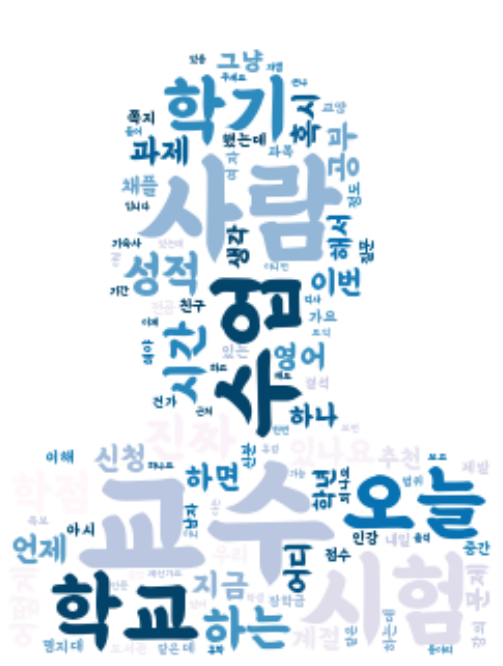

In [117]:
wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=100, mask=custom_mask, # wordÏùò ÏµúÎåÄ Í∞ØÏàòÏôÄ ÎßàÏä§ÌÅ¨, font-sizeÏÑ§Ï†ï
                     max_font_size=70, colormap='PuBu')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # ÎßàÏä§ÌÅ¨Ïö© Ïù¥ÎØ∏ÏßÄÏùò ÏÉâÏúºÎ°ú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
plt.show()